## Here, we used new training data that has randomized dispersions and phases to try and predict the dispersion as well as the phase.


In [1]:
#Load packages
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import *

from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler  



## This function will plot the true vs. predicted with various line fits
def plotSummary(true, predicted, name):
    #from pylab import *
    #import numpy as np
    #import matplotlib.pyplot as plt
    
    figure()
    plt.scatter(true,predicted, alpha = 0.2)
    
    plt.title(name)
    plt.xlabel('True')
    plt.ylabel('Predicted')

    xmin, xmax = plt.xlim()
    plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one

    fit_temp = np.polyfit(true, predicted,1)
    xp = np.linspace(xmin, xmax, 100)
    p = np.poly1d(fit_temp)
    plt.plot(xp, p(xp), '-', color = 'black')
    
    print(' ')
    print('RMSE on test data:', np.sqrt(mean_squared_error(true, predicted)), 'for ', name)
    print('R^2 Score on test data:', r2_score(true, predicted), 'for', name)

    
    return

def myResiduals(testY, predictY):
    ## residuals 1
    i = 0 # resetting i
    iterations = len(testY) # gets number of dots/points
    residual_sum = 0 # initializes sum of residuals
    for i in range (0,iterations): # for every dot/point
       ys = testY # get ys of testing data
       ys = ys.values # take out indexing, data types, names
       y = ys[i]
       predict_ys = predictY.values # get ys of all dots/points
       predict_y = predict_ys[i] # get the y value of the dot/point at specfic x value i
       diff = y - predict_y # find the difference in height
       diff = abs(diff) # take the absolute value
       residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals
    residual_average = residual_sum/iterations # find the average of the residuals
    print('The average residual for predict:', round(residual_average,4)) # display average of residuals

    minY = min(ys) # find the minimum y value for testing data
    maxY = max(ys) # find the max y value for testing data
    minpredict = min(predictY) # find the min y value for the prediction data
    maxpredict = max(predictY) # find the max y value for the prediction data
    #print('minY', minY, 'maxY', maxY)
    #print('minpredict', minpredict, 'maxpredict', maxpredict)
    rangeY = minY + maxY # find the range of the testing data
    rangepredict = minpredict - maxpredict # find the range of the predictions
    #print('rangeY', rangeY)
    #print('rangepredict', rangepredict)
    residual_percent_rangepredict = (residual_average/abs(rangepredict))*100 # calculate what percent the residual is of the range
    print('Residual is this percent of predict range', round(residual_percent_rangepredict,3), '%')
    
    return
    

In [2]:
#Load the training data

subset = 5 #every 10 mV
start = 50 # for starting at -300mV

peak_names = ['peak1', 'peak2', 'peak3', 'peak4']
locs_names = ['loc1', 'loc2', 'loc3', 'loc4']
width_names = ['width1', 'width2', 'width3','width4']
prom_names = ['prom1', 'prom2', 'prom3', 'prom4']

energy = (pd.read_csv('Training_Data/Hexagon/HexagonBias_v4.csv', header=None)*1000).round().astype(int)
energy_names = ['E_%i_mV' % item for item in list(energy.T[0])]
energy_names2 = energy_names[start::subset]
energy_names3 = energy_names[start::1]

col_names2 = ['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha']+ peak_names + locs_names + width_names + prom_names
col_names2a = ['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha']+ peak_names[1:] + locs_names + width_names + prom_names[1:]

col_names1 = ['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha'] + energy_names

#col_names_both = col_names2 + energy_names2
col_names_both = col_names2a + energy_names2
col_names_a = ['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha'] + energy_names3

data1 = pd.read_csv('Training_Data/Hexagon/HexagonTrainingData062718_v9_specPoints.csv', header = None, names = col_names1)
data2 = pd.read_csv('Training_Data/Hexagon/HexagonTrainingData062718_v9_peakinfo.csv', header = None, names = col_names2)
save_data = True

data = data2.join(data1.drop(['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha'], axis = 1), how = 'left')
data = data[col_names_both]

data1a = data1[col_names_a]
data2a = data2[col_names2a]

X1 = data1a.drop(['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha'], axis = 1)
Y1 = data1a[['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha']]

X2 = data2a.drop(['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha'], axis = 1)
Y2 = data2a[['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha']]

X = data.drop(['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha'], axis = 1)
Y = data[['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha']]

ts1 = 0.3
rs1 = 42

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = ts1, random_state = rs1)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = ts1, random_state = rs1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = ts1, random_state = rs1)


X1.head()

E_-300_mV  E_-298_mV  E_-296_mV  E_-294_mV  E_-292_mV  E_-290_mV  \
0    0.23882    0.23152    0.22630    0.22276    0.22095    0.22074   
1    0.13010    0.15006    0.17606    0.21197    0.26000    0.32613   
2    1.62320    1.67220    1.70830    1.73080    1.73810    1.73070   
3    6.39180    3.10470    1.76910    1.13750    0.79020    0.58400   
4    4.93760    3.75580    2.78690    2.08610    1.60270    1.26700   

   E_-288_mV  E_-286_mV  E_-284_mV  E_-282_mV    ...     E_482_mV  E_484_mV  \
0    0.22201    0.22486    0.22914    0.23508    ...      0.62323   0.62371   
1    0.42330    0.57633    0.82535    1.28060    ...      0.12581   0.12903   
2    1.70940    1.67590    1.63240    1.58160    ...      1.01510   1.01320   
3    0.45382    0.36610    0.30224    0.25473    ...      0.15534   0.15561   
4    1.02460    0.85055    0.72115    0.62208    ...      1.21800   1.23370   

   E_486_mV  E_488_mV  E_490_mV  E_492_mV  E_494_mV  E_496_mV  E_498_mV  \
0   0.62546   0.62839   0.63288   0.63869   0.64565   0.65423   0.66432   
1   0.13200   0.13683   0.14167   0.14810   0.15516   0.16464   0.17402   
2   1.01100   1.00870   1.00640   1.00370   1.00110   0.99801   0.99497   
3   0.15664   0.15788   0.15934   0.16199   0.16514   0.16840   0.17335   
4   1.25490   1.28390   1.32290   1.36940   1.42420   1.48600   1.55150   

   E_500_mV  
0   0.67559  
1   0.18740  
2   0.99171  
3   0.17833  
4   1.61830  

[5 rows x 401 columns]

In [3]:
data1a.head()

deltaI    deltaR      E_0    mstar   alpha  E_-300_mV  E_-298_mV  \
0  0.81472 -0.147980  0.41370  0.43701 -8.6764    0.23882    0.23152   
1  0.09754 -1.133300  0.45569  0.44363 -5.3511    0.13010    0.15006   
2  0.15761 -0.046193  0.49672  0.37281 -6.9972    1.62320    1.67220   
3  0.14189 -0.908300  0.49257  0.41883 -5.4051    6.39180    3.10470   
4  0.65574 -1.514700  0.48591  0.44010 -8.2126    4.93760    3.75580   

   E_-296_mV  E_-294_mV  E_-292_mV    ...     E_482_mV  E_484_mV  E_486_mV  \
0    0.22630    0.22276    0.22095    ...      0.62323   0.62371   0.62546   
1    0.17606    0.21197    0.26000    ...      0.12581   0.12903   0.13200   
2    1.70830    1.73080    1.73810    ...      1.01510   1.01320   1.01100   
3    1.76910    1.13750    0.79020    ...      0.15534   0.15561   0.15664   
4    2.78690    2.08610    1.60270    ...      1.21800   1.23370   1.25490   

   E_488_mV  E_490_mV  E_492_mV  E_494_mV  E_496_mV  E_498_mV  E_500_mV  
0   0.62839   0.63288   0.63869   0.64565   0.65423   0.66432   0.67559  
1   0.13683   0.14167   0.14810   0.15516   0.16464   0.17402   0.18740  
2   1.00870   1.00640   1.00370   1.00110   0.99801   0.99497   0.99171  
3   0.15788   0.15934   0.16199   0.16514   0.16840   0.17335   0.17833  
4   1.28390   1.32290   1.36940   1.42420   1.48600   1.55150   1.61830  

[5 rows x 406 columns]

In [4]:
data2a.head()

deltaI    deltaR      E_0    mstar   alpha    peak2    peak3   peak4  \
0  0.81472 -0.147980  0.41370  0.43701 -8.6764   5.5667   3.6113  2.7913   
1  0.09754 -1.133300  0.45569  0.44363 -5.3511  16.8260  12.9150  9.8592   
2  0.15761 -0.046193  0.49672  0.37281 -6.9972   1.4604   1.2477  1.1347   
3  0.14189 -0.908300  0.49257  0.41883 -5.4051  12.3480   8.9410  6.3451   
4  0.65574 -1.514700  0.48591  0.44010 -8.2126   4.4592   3.2560  2.4006   

    loc1   loc2   loc3   loc4    width1    width2    width3    width4  \
0 -0.398 -0.336 -0.232 -0.084  0.001877  0.009717  0.019692  0.029163   
1 -0.378 -0.274 -0.124  0.072  0.003477  0.004698  0.007322  0.009501   
2 -0.292 -0.116  0.110  0.386  0.042705  0.056824  0.079090  0.080406   
3 -0.304 -0.144  0.060  0.308  0.005644  0.007879  0.010993  0.014262   
4 -0.302 -0.152  0.038  0.262  0.012698  0.019628  0.026555  0.032085   

      prom2     prom3    prom4  
0   5.34590   3.23250  2.25190  
1  16.74500  12.80400  9.73970  
2   0.62049   0.36429  0.14303  
3  12.22200   8.78560  6.14070  
4   4.10670   2.83680  1.88050

# Using the Best Models on the Hexagon Data 

## Statsmodels

### spec points

 
RMSE on test data: 1.030803160147181 for  Delta I
R^2 Score on test data: -11.655102703401699 for Delta I
 
RMSE on test data: 0.8051500524366062 for  Delta R
R^2 Score on test data: -2.2092643849497557 for Delta R
 
RMSE on test data: 0.09100790463617957 for  E_0
R^2 Score on test data: -8.858668124370672 for E_0
 
RMSE on test data: 0.08539752966572486 for  m star
R^2 Score on test data: -2.83388189776421 for m star
 
RMSE on test data: 9.744718407477073 for  alpha
R^2 Score on test data: -10.501235107761625 for alpha
The average residual for predict: 0.3115
Residual is this percent of predict range 0.643 %
The average residual for predict: 0.4421
Residual is this percent of predict range 1.285 %


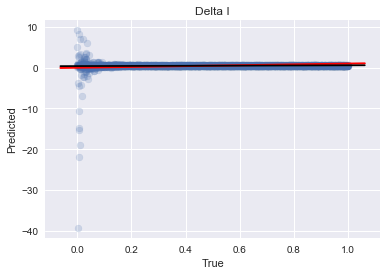

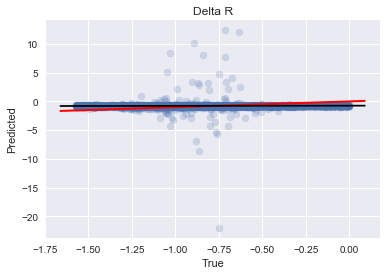

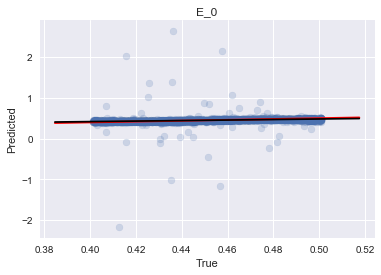

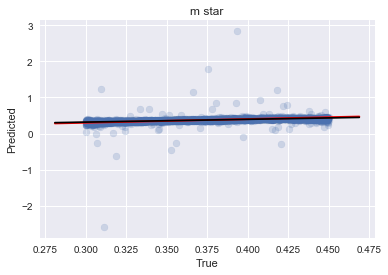

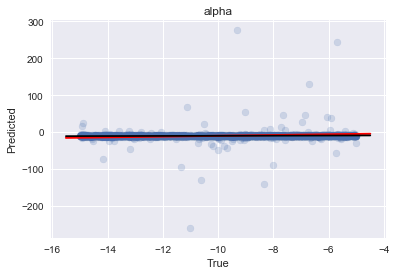

In [5]:
#Initialize and fit OLS model for deltaI 
model_OLS_I_sp = sm.OLS(Y1_train['deltaI'], X1_train)
model_OLS_R_sp = sm.OLS(Y1_train['deltaR'], X1_train)
model_OLS_E0_sp = sm.OLS(Y1_train['E_0'], X1_train)
model_OLS_mstar_sp = sm.OLS(Y1_train['mstar'], X1_train)
model_OLS_alpha_sp = sm.OLS(Y1_train['alpha'], X1_train)

results_OLS_I_sp = model_OLS_I_sp.fit()
results_OLS_R_sp = model_OLS_R_sp.fit()
results_OLS_E0_sp = model_OLS_E0_sp.fit()
results_OLS_mstar_sp = model_OLS_mstar_sp.fit()
results_OLS_alpha_sp = model_OLS_alpha_sp.fit()

#Make predictions on testing data
predictions_OLS_I_sp = results_OLS_I_sp.predict(X1_test) # make the predictions by the model
predictions_OLS_R_sp = results_OLS_R_sp.predict(X1_test)
predictions_OLS_E0_sp = results_OLS_E0_sp.predict(X1_test)
predictions_OLS_mstar_sp = results_OLS_mstar_sp.predict(X1_test)
predictions_OLS_alpha_sp = results_OLS_alpha_sp.predict(X1_test)

scores_OLS = [r2_score(Y1_test['deltaI'], predictions_OLS_I_sp), 
              r2_score(Y1_test['deltaR'], predictions_OLS_R_sp), 
              r2_score(Y1_test['E_0'], predictions_OLS_E0_sp), 
              r2_score(Y1_test['mstar'], predictions_OLS_mstar_sp),
              r2_score(Y1_test['alpha'], predictions_OLS_alpha_sp) ]

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y1_test['deltaI'], predictions_OLS_I_sp,'Delta I')
#ylim([-1,5])
plotSummary(Y1_test['deltaR'], predictions_OLS_R_sp, 'Delta R')
plotSummary(Y1_test['E_0'], predictions_OLS_E0_sp, 'E_0')
plotSummary(Y1_test['mstar'], predictions_OLS_mstar_sp, 'm star')
plotSummary(Y1_test['alpha'], predictions_OLS_alpha_sp, 'alpha')

myResiduals(Y1_test['deltaI'], predictions_OLS_I_sp)
myResiduals(Y1_test['deltaR'], predictions_OLS_R_sp)



### peak info

 
RMSE on test data: 0.23633251743977038 for  Delta I
R^2 Score on test data: 0.33478634770151605 for Delta I
 
RMSE on test data: 0.30651105866382267 for  Delta R
R^2 Score on test data: 0.5349023537380775 for Delta R
 
RMSE on test data: 0.016988666659209995 for  E_0
R^2 Score on test data: 0.6564589755270251 for E_0
 
RMSE on test data: 0.03222445251902046 for  mstar
R^2 Score on test data: 0.45409231277632056 for mstar
 
RMSE on test data: 2.8321547996461547 for  alpha
R^2 Score on test data: 0.028506569238670565 for alpha
The average residual for predict: 0.1917
Residual is this percent of predict range 6.981 %
The average residual for predict: 0.2473
Residual is this percent of predict range 8.701 %


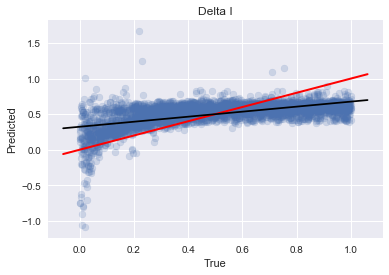

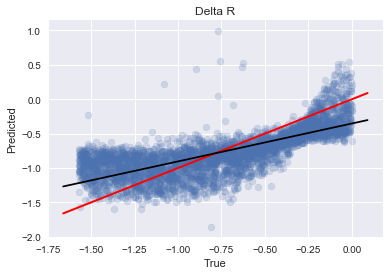

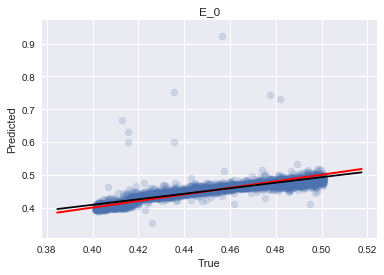

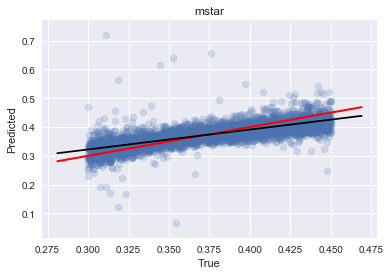

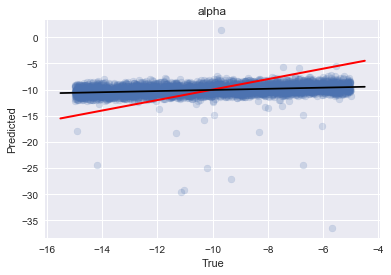

In [6]:
#Initialize and fit OLS model for deltaI 
model_OLS_I_pi = sm.OLS(Y2_train['deltaI'], X2_train)
model_OLS_R_pi = sm.OLS(Y2_train['deltaR'], X2_train)
model_OLS_E0_pi = sm.OLS(Y2_train['E_0'], X2_train)
model_OLS_mstar_pi = sm.OLS(Y2_train['mstar'], X2_train)
model_OLS_alpha_pi = sm.OLS(Y2_train['alpha'], X2_train)

results_OLS_I_pi = model_OLS_I_pi.fit()
results_OLS_R_pi = model_OLS_R_pi.fit()
results_OLS_E0_pi = model_OLS_E0_pi.fit()
results_OLS_mstar_pi = model_OLS_mstar_pi.fit()
results_OLS_alpha_pi = model_OLS_alpha_pi.fit()

#Make predictions on testing data
predictions_OLS_I_pi = results_OLS_I_pi.predict(X2_test) # make the predictions by the model
predictions_OLS_R_pi = results_OLS_R_pi.predict(X2_test)
predictions_OLS_E0_pi = results_OLS_E0_pi.predict(X2_test)
predictions_OLS_mstar_pi = results_OLS_mstar_pi.predict(X2_test)
predictions_OLS_alpha_pi = results_OLS_alpha_pi.predict(X2_test)

scores_OLS_pi = [r2_score(Y2_test['deltaI'], predictions_OLS_I_pi), 
                 r2_score(Y2_test['deltaR'], predictions_OLS_R_pi), 
                 r2_score(Y2_test['E_0'], predictions_OLS_E0_pi), 
                 r2_score(Y2_test['mstar'], predictions_OLS_mstar_pi), 
                 r2_score(Y2_test['alpha'], predictions_OLS_alpha_pi)]

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y2_test['deltaI'], predictions_OLS_I_pi,'Delta I')
#ylim([-1,5])
plotSummary(Y2_test['deltaR'], predictions_OLS_R_pi, 'Delta R')

plotSummary(Y2_test['E_0'], predictions_OLS_E0_pi, 'E_0')
plotSummary(Y2_test['mstar'], predictions_OLS_mstar_pi, 'mstar')
plotSummary(Y2_test['alpha'], predictions_OLS_alpha_pi, 'alpha')

myResiduals(Y2_test['deltaI'], predictions_OLS_I_pi)
myResiduals(Y2_test['deltaR'], predictions_OLS_R_pi)




### spec points and peak info

 
RMSE on test data: 0.23805507501289838 for  Delta I
R^2 Score on test data: 0.32505391836158604 for Delta I
 
RMSE on test data: 0.31763226579757764 for  Delta R
R^2 Score on test data: 0.500539588514237 for Delta R
 
RMSE on test data: 0.014272436779244568 for  E_0
R^2 Score on test data: 0.7575309715122736 for E_0
 
RMSE on test data: 0.024401556309104885 for  mstar
R^2 Score on test data: 0.6869720140358614 for mstar
 
RMSE on test data: 2.7522061800655853 for  alpha
R^2 Score on test data: 0.08258079961581621 for alpha
The average residual for predict: 0.1885
Residual is this percent of predict range 4.586 %
The average residual for predict: 0.2409
Residual is this percent of predict range 4.15 %


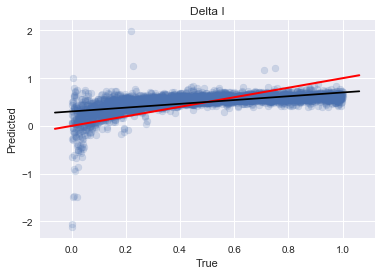

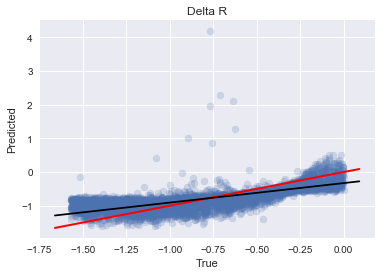

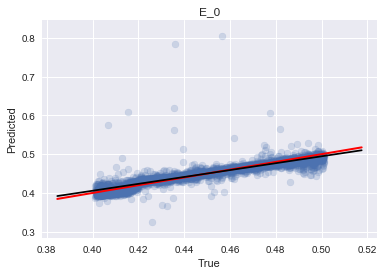

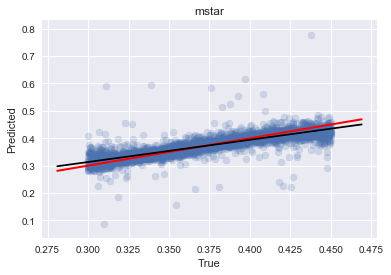

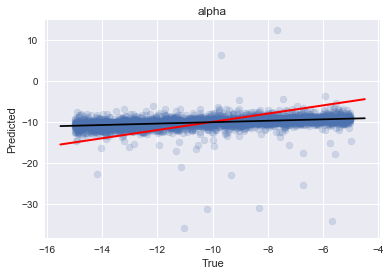

In [7]:
#Initialize and fit OLS model for deltaI 
model_OLS_I_both = sm.OLS(Y_train['deltaI'], X_train)
model_OLS_R_both = sm.OLS(Y_train['deltaR'], X_train)
model_OLS_E0_both = sm.OLS(Y_train['E_0'], X_train)
model_OLS_mstar_both = sm.OLS(Y_train['mstar'], X_train)
model_OLS_alpha_both = sm.OLS(Y_train['alpha'], X_train)

results_OLS_I_both = model_OLS_I_both.fit()
results_OLS_R_both = model_OLS_R_both.fit()
results_OLS_E0_both = model_OLS_E0_both.fit()
results_OLS_mstar_both = model_OLS_mstar_both.fit()
results_OLS_alpha_both = model_OLS_alpha_both.fit()

#Make predictions on testing data
predictions_OLS_I_both = results_OLS_I_both.predict(X_test) # make the predictions by the model
predictions_OLS_R_both = results_OLS_R_both.predict(X_test)
predictions_OLS_E0_both = results_OLS_E0_both.predict(X_test)
predictions_OLS_mstar_both = results_OLS_mstar_both.predict(X_test)
predictions_OLS_alpha_both = results_OLS_alpha_both.predict(X_test)

scores_OLS_both = [r2_score(Y_test['deltaI'], predictions_OLS_I_both), 
                   r2_score(Y_test['deltaR'], predictions_OLS_R_both), 
                   r2_score(Y_test['E_0'], predictions_OLS_E0_both), 
                   r2_score(Y_test['mstar'], predictions_OLS_mstar_both), 
                   r2_score(Y_test['alpha'], predictions_OLS_alpha_both)]

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y_test['deltaI'], predictions_OLS_I_both,'Delta I')
#ylim([-1,5])
plotSummary(Y_test['deltaR'], predictions_OLS_R_both, 'Delta R')

plotSummary(Y_test['E_0'], predictions_OLS_E0_both, 'E_0')
plotSummary(Y_test['mstar'], predictions_OLS_mstar_both, 'mstar')
plotSummary(Y_test['alpha'], predictions_OLS_alpha_both, 'alpha')

myResiduals(Y_test['deltaI'], predictions_OLS_I_both)
myResiduals(Y_test['deltaR'], predictions_OLS_R_both)



## Decision Tree 

### spec points

 
RMSE on test data: 0.25252832748875303 for  deltaI Depth 60
R^2 Score on test data: 0.24048842623310618 for deltaI Depth 60
 
RMSE on test data: 0.3555661209242696 for  deltaR Depth 60
R^2 Score on test data: 0.3741178107308979 for deltaR Depth 60
 
RMSE on test data: 0.018410822809215934 for  E_0
R^2 Score on test data: 0.5965344921109824 for E_0
 
RMSE on test data: 0.026902942581652618 for  mstar
R^2 Score on test data: 0.619506112693855 for mstar
 
RMSE on test data: 2.7021779869247187 for  alpha
R^2 Score on test data: 0.11563041690026121 for alpha


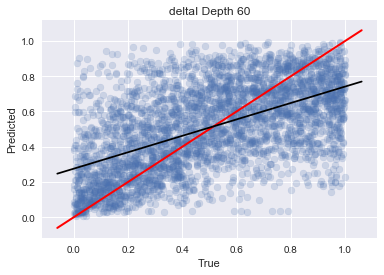

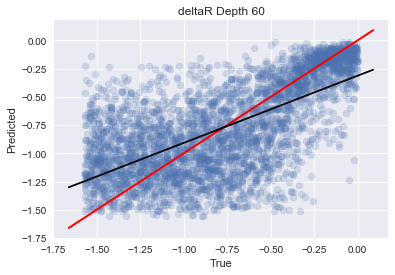

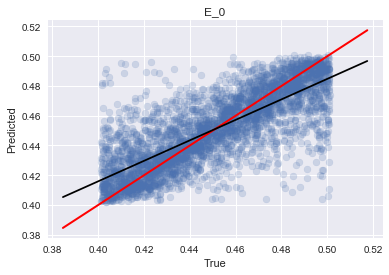

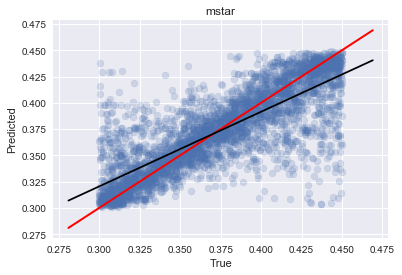

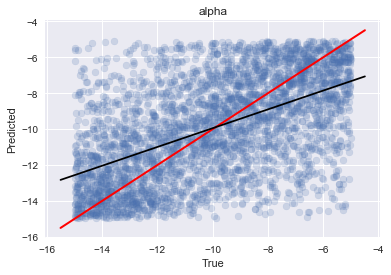

In [8]:
#Initialize the model
rs = 42
regr_DT_sp = DecisionTreeRegressor(max_depth=60, min_samples_leaf = 2, random_state = rs)

#Fit the model
regr_DT_sp = regr_DT_sp.fit(X1_train, Y1_train)


#print(data1[data1['Regr - DT']>0.001])

#Use model to predict
predictions_DT_sp = regr_DT_sp.predict(X1_test)

scores_DT = [r2_score(Y1_test['deltaI'], predictions_DT_sp[:,0]), 
             r2_score(Y1_test['deltaR'], predictions_DT_sp[:,1]),
             r2_score(Y1_test['E_0'], predictions_DT_sp[:,2]), 
             r2_score(Y1_test['mstar'], predictions_DT_sp[:,3]), 
             r2_score(Y1_test['alpha'], predictions_DT_sp[:,4]) ]

#Plot results
plotSummary(Y1_test['deltaI'], predictions_DT_sp[:,0], 'deltaI Depth 60')
#myResiduals(Y_test['deltaI'], y_3[:,0])
plotSummary(Y1_test['deltaR'], predictions_DT_sp[:,1], 'deltaR Depth 60')
#myResiduals(Y_test['deltaR'], y_3[:,1])
plotSummary(Y1_test['E_0'], predictions_DT_sp[:,2], 'E_0')
plotSummary(Y1_test['mstar'], predictions_DT_sp[:,3], 'mstar')
plotSummary(Y1_test['alpha'], predictions_DT_sp[:,4], 'alpha')


### peak info

 
RMSE on test data: 0.17017624011196608 for  deltaI Depth 60
R^2 Score on test data: 0.6550850334940368 for deltaI Depth 60
 
RMSE on test data: 0.27004617282544324 for  deltaR Depth 60
R^2 Score on test data: 0.6389827956058849 for deltaR Depth 60
 
RMSE on test data: 0.019390507637019105 for  E_0 DT pi
R^2 Score on test data: 0.5524532844400506 for E_0 DT pi
 
RMSE on test data: 0.02277384612773709 for  mstar DT pi
R^2 Score on test data: 0.7273403463555224 for mstar DT pi
 
RMSE on test data: 2.9320530714408295 for  alpha
R^2 Score on test data: -0.04123689298333799 for alpha


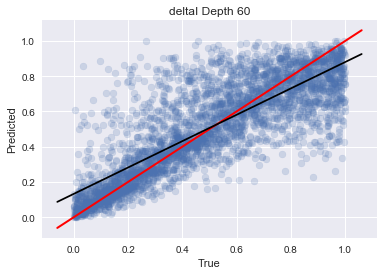

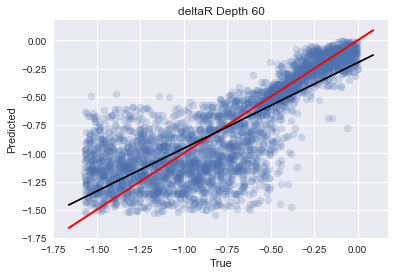

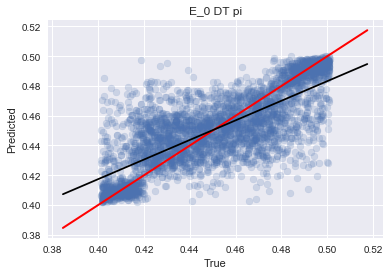

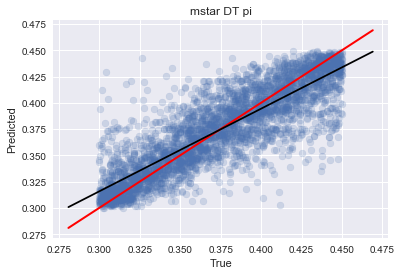

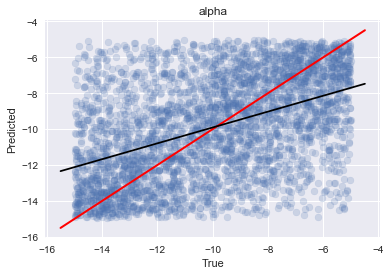

In [9]:
#Initialize the model
rs = 42
regr_DT_pi = DecisionTreeRegressor(max_depth=60, min_samples_leaf = 2, random_state = rs)

#Fit the model
regr_DT_pi.fit(X2_train, Y2_train)


#print(data1[data1['Regr - DT']>0.001])

#Use model to predict
predictions_DT_pi = regr_DT_pi.predict(X2_test)

scores_DT_pi = [r2_score(Y2_test['deltaI'], predictions_DT_pi[:,0]), 
                r2_score(Y2_test['deltaR'], predictions_DT_pi[:,1]), 
                r2_score(Y2_test['E_0'], predictions_DT_pi[:,2]), 
                r2_score(Y2_test['mstar'], predictions_DT_pi[:,3]), 
                r2_score(Y2_test['alpha'], predictions_DT_pi[:,4])]

#Plot results
plotSummary(Y2_test['deltaI'], predictions_DT_pi[:,0], 'deltaI Depth 60')
#myResiduals(Y_test['deltaI'], y_3[:,0])
plotSummary(Y2_test['deltaR'], predictions_DT_pi[:,1], 'deltaR Depth 60')
#myResiduals(Y_test['deltaR'], y_3[:,1])

plotSummary(Y2_test['E_0'], predictions_DT_pi[:,2], 'E_0 DT pi')
plotSummary(Y2_test['mstar'], predictions_DT_pi[:,3], 'mstar DT pi')
plotSummary(Y2_test['alpha'], predictions_DT_pi[:,4], 'alpha')

### spec points and peak info

 
RMSE on test data: 0.22408990130662124 for  deltaI Depth 60
R^2 Score on test data: 0.4019207127689419 for deltaI Depth 60
 
RMSE on test data: 0.3252311891283578 for  deltaR Depth 60
R^2 Score on test data: 0.47635589411779033 for deltaR Depth 60
 
RMSE on test data: 0.019362877868137778 for  E_0 DT both
R^2 Score on test data: 0.5537278052097541 for E_0 DT both
 
RMSE on test data: 0.02678511375727139 for  mstar DT both
R^2 Score on test data: 0.6228317688186269 for mstar DT both
 
RMSE on test data: 2.8205716475143348 for  alpha
R^2 Score on test data: 0.03643688761442776 for alpha


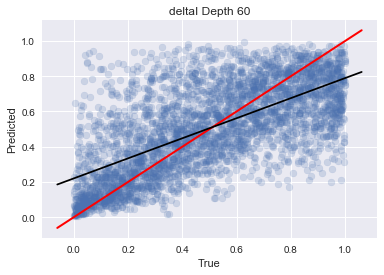

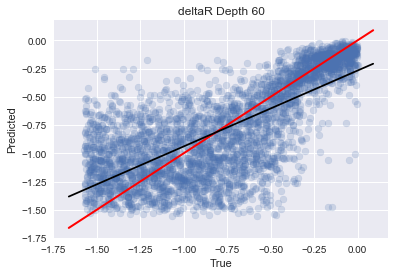

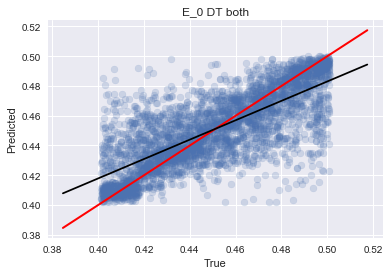

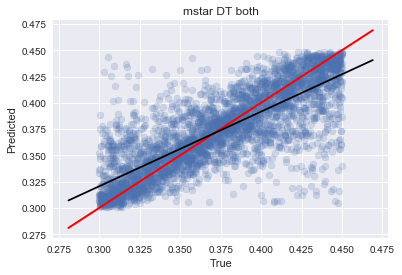

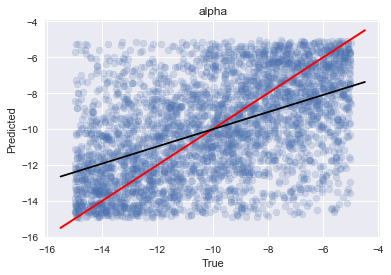

In [10]:
#Initialize the model
rs = 42
regr_DT_both = DecisionTreeRegressor(max_depth=60, min_samples_leaf = 2, random_state = rs)

#Fit the model
regr_DT_both.fit(X_train, Y_train)

#print(data1[data1['Regr - DT']>0.001])

#Use model to predict
predictions_DT_both = regr_DT_both.predict(X_test)

scores_DT_both = [r2_score(Y_test['deltaI'], predictions_DT_both[:,0]), 
                  r2_score(Y_test['deltaR'], predictions_DT_both[:,1]), 
                  r2_score(Y_test['E_0'], predictions_DT_both[:,2]), 
                  r2_score(Y_test['mstar'], predictions_DT_both[:,3]), 
                  r2_score(Y_test['alpha'], predictions_DT_both[:,4])]

#Plot results
plotSummary(Y_test['deltaI'], predictions_DT_both[:,0], 'deltaI Depth 60')
#myResiduals(Y_test['deltaI'], y_3[:,0])
plotSummary(Y_test['deltaR'], predictions_DT_both[:,1], 'deltaR Depth 60')
#myResiduals(Y_test['deltaR'], y_3[:,1])

plotSummary(Y_test['E_0'], predictions_DT_both[:,2], 'E_0 DT both')
plotSummary(Y_test['mstar'], predictions_DT_both[:,3], 'mstar DT both')
plotSummary(Y_test['alpha'], predictions_DT_both[:,4], 'alpha')

## Random Forest

### spec points

 
RMSE on test data: 0.181232207690699 for  deltaI 10
R^2 Score on test data: 0.6088125141573884 for deltaI 10
 
RMSE on test data: 0.24775291623049284 for  deltaR 10
R^2 Score on test data: 0.6961289015844634 for deltaR 10
 
RMSE on test data: 0.01105041058609153 for  E0
R^2 Score on test data: 0.8546493942062756 for E0
 
RMSE on test data: 0.014362724005182414 for  mstar
R^2 Score on test data: 0.8915519506058771 for mstar
 
RMSE on test data: 1.91449235284577 for  alpha
R^2 Score on test data: 0.5560713587698426 for alpha


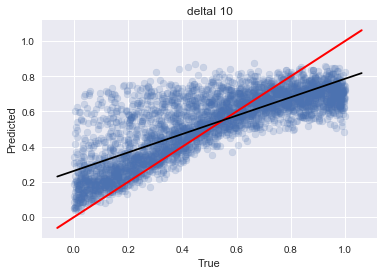

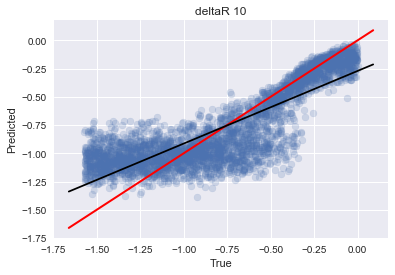

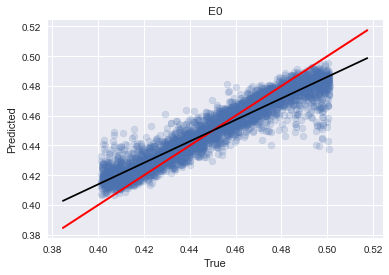

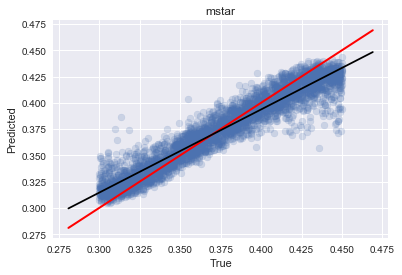

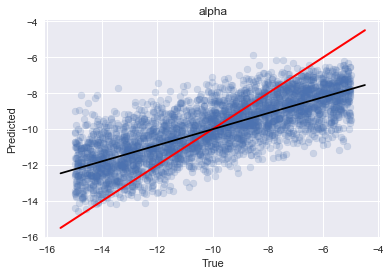

In [11]:
rs = 42
regr_RF_sp = RandomForestRegressor(max_depth = 40, n_estimators = 30, random_state=rs)

model_RF_sp = regr_RF_sp.fit(X1_train, Y1_train)

predictions_RF_sp = model_RF_sp.predict(X1_test)

scores_RF = [r2_score(Y1_test['deltaI'], predictions_RF_sp[:,0]), 
             r2_score(Y1_test['deltaR'], predictions_RF_sp[:,1]), 
             r2_score(Y1_test['E_0'], predictions_RF_sp[:,2]), 
             r2_score(Y1_test['mstar'], predictions_RF_sp[:,3]), 
             r2_score(Y1_test['alpha'], predictions_RF_sp[:,4])]

plotSummary(Y1_test['deltaI'], predictions_RF_sp[:,0], 'deltaI 10')
plotSummary(Y1_test['deltaR'], predictions_RF_sp[:,1], 'deltaR 10')
plotSummary(Y1_test['E_0'], predictions_RF_sp[:,2], 'E0')
plotSummary(Y1_test['mstar'], predictions_RF_sp[:,3], 'mstar')
plotSummary(Y1_test['alpha'], predictions_RF_sp[:,4], 'alpha')



### peak info

 
RMSE on test data: 0.1309838566117394 for  deltaI 10
R^2 Score on test data: 0.7956617177360379 for deltaI 10
 
RMSE on test data: 0.21191289220070267 for  deltaR 10
R^2 Score on test data: 0.7776861073891358 for deltaR 10
 
RMSE on test data: 0.011380458620614755 for  E0
R^2 Score on test data: 0.8458372160178056 for E0
 
RMSE on test data: 0.012997361790168988 for  mstar
R^2 Score on test data: 0.911190682880014 for mstar
 
RMSE on test data: 2.201698046769808 for  alpha
R^2 Score on test data: 0.41288739042944844 for alpha


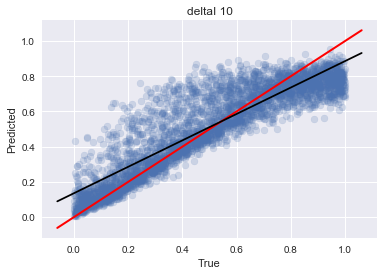

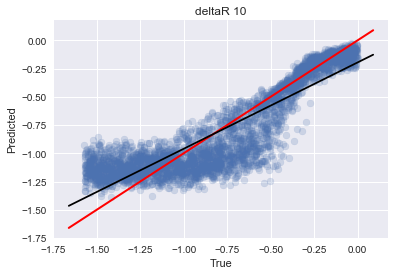

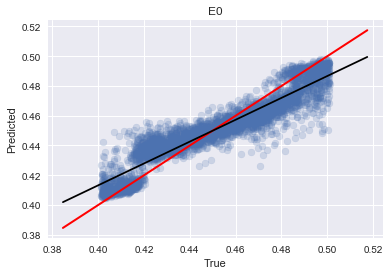

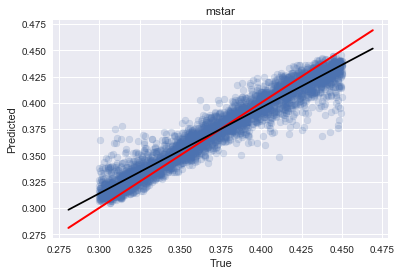

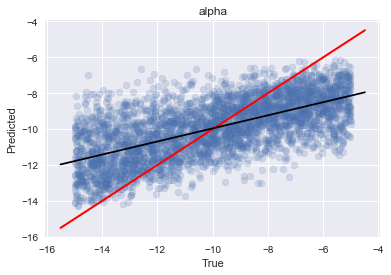

In [12]:
rs = 42
regr_RF_pi = RandomForestRegressor(max_depth = 40, n_estimators = 30, random_state=rs)

model_RF_pi = regr_RF_pi.fit(X2_train, Y2_train)

predictions_RF_pi = model_RF_pi.predict(X2_test)

scores_RF_pi = [r2_score(Y2_test['deltaI'], predictions_RF_pi[:,0]), 
             r2_score(Y2_test['deltaR'], predictions_RF_pi[:,1]), 
             r2_score(Y2_test['E_0'], predictions_RF_pi[:,2]), 
             r2_score(Y2_test['mstar'], predictions_RF_pi[:,3]), 
             r2_score(Y2_test['alpha'], predictions_RF_pi[:,4])]

plotSummary(Y2_test['deltaI'], predictions_RF_pi[:,0], 'deltaI 10')
plotSummary(Y2_test['deltaR'], predictions_RF_pi[:,1], 'deltaR 10')
plotSummary(Y2_test['E_0'], predictions_RF_pi[:,2], 'E0')
plotSummary(Y2_test['mstar'], predictions_RF_pi[:,3], 'mstar')
plotSummary(Y2_test['alpha'], predictions_RF_pi[:,4], 'alpha')



### spec points and peak info

 
RMSE on test data: 0.1629443239774666 for  deltaI 10
R^2 Score on test data: 0.6837775748219517 for deltaI 10
 
RMSE on test data: 0.23865405160666062 for  deltaR 10
R^2 Score on test data: 0.718038722942139 for deltaR 10
 
RMSE on test data: 0.01053584588618925 for  E0
R^2 Score on test data: 0.8678707909827487 for E0
 
RMSE on test data: 0.014444331140119714 for  mstar
R^2 Score on test data: 0.8903160740053304 for mstar
 
RMSE on test data: 2.030586842424435 for  alpha
R^2 Score on test data: 0.500599435195748 for alpha


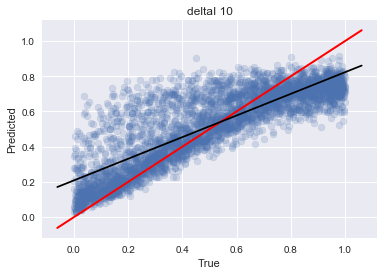

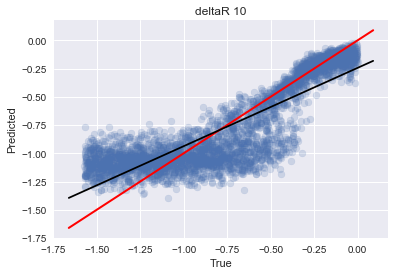

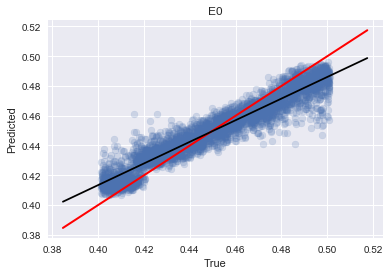

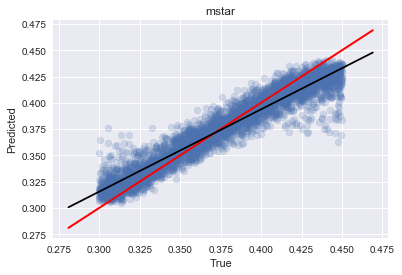

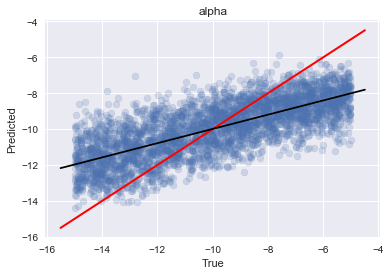

In [13]:
rs = 42
regr_RF_both = RandomForestRegressor(max_depth = 40, n_estimators = 30, random_state=rs)

model_RF_both = regr_RF_both.fit(X_train, Y_train)

predictions_RF_both = model_RF_both.predict(X_test)

scores_RF_both = [r2_score(Y_test['deltaI'], predictions_RF_both[:,0]), 
             r2_score(Y_test['deltaR'], predictions_RF_both[:,1]), 
             r2_score(Y_test['E_0'], predictions_RF_both[:,2]), 
             r2_score(Y_test['mstar'], predictions_RF_both[:,3]), 
             r2_score(Y_test['alpha'], predictions_RF_both[:,4])]

plotSummary(Y_test['deltaI'], predictions_RF_both[:,0], 'deltaI 10')
plotSummary(Y_test['deltaR'], predictions_RF_both[:,1], 'deltaR 10')
plotSummary(Y_test['E_0'], predictions_RF_both[:,2], 'E0')
plotSummary(Y_test['mstar'], predictions_RF_both[:,3], 'mstar')
plotSummary(Y_test['alpha'], predictions_RF_both[:,4], 'alpha')



## Independent Random Forests

### spec points

 
RMSE on test data: 0.2276069852011689 for  deltaI 10
R^2 Score on test data: 0.7435380039572337 for deltaI 10
 
RMSE on test data: 0.14987792393951382 for  deltaR 10
R^2 Score on test data: 0.7324595033344109 for deltaR 10
 
RMSE on test data: 0.005509687746266157 for  E_0
R^2 Score on test data: 0.9638661706214514 for E_0
 
RMSE on test data: 0.009908651472805506 for  mstar
R^2 Score on test data: 0.9483848468511525 for mstar
 
RMSE on test data: 1.856892971343722 for  alpha
R^2 Score on test data: 0.5823815873031638 for alpha


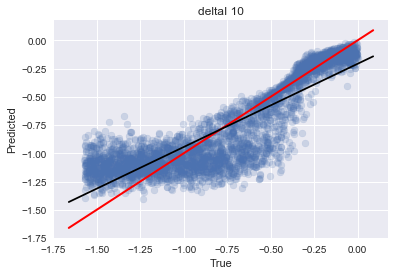

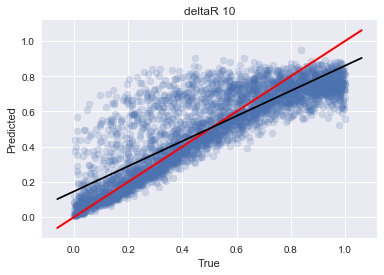

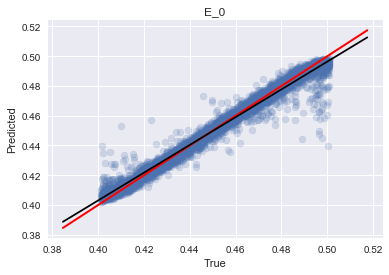

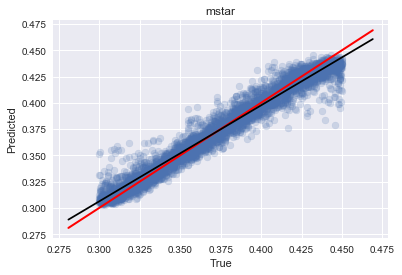

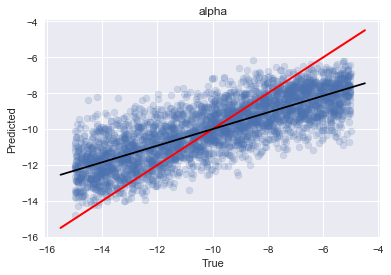

In [14]:
#Trying Independent Random Forest

rs = 42
md = 40
n = 40

regr_RF2_dr_sp = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_di_sp = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_E0_sp = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_mstar_sp = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_alpha_sp = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)


model_RF2_dr_sp = regr_RF2_dr_sp.fit(X1_train, Y1_train['deltaR'])
model_RF2_di_sp = regr_RF2_di_sp.fit(X1_train, Y1_train['deltaI'])
model_RF2_E0_sp = regr_RF2_E0_sp.fit(X1_train, Y1_train['E_0'])
model_RF2_mstar_sp = regr_RF2_mstar_sp.fit(X1_train, Y1_train['mstar'])
model_RF2_alpha_sp = regr_RF2_alpha_sp.fit(X1_train, Y1_train['alpha'])

predictions_RF2_dr_sp = model_RF2_dr_sp.predict(X1_test)
predictions_RF2_di_sp = model_RF2_di_sp.predict(X1_test)
predictions_RF2_E0_sp = model_RF2_E0_sp.predict(X1_test)
predictions_RF2_mstar_sp = model_RF2_mstar_sp.predict(X1_test)
predictions_RF2_alpha_sp = model_RF2_alpha_sp.predict(X1_test)

scores_RF2 = [r2_score(Y1_test['deltaI'], predictions_RF2_di_sp), 
              r2_score(Y1_test['deltaR'], predictions_RF2_dr_sp), 
              r2_score(Y1_test['E_0'], predictions_RF2_E0_sp), 
              r2_score(Y1_test['mstar'], predictions_RF2_mstar_sp), 
              r2_score(Y1_test['alpha'], predictions_RF2_alpha_sp)]

plotSummary(Y1_test['deltaR'], predictions_RF2_dr_sp, 'deltaI 10')
plotSummary(Y1_test['deltaI'], predictions_RF2_di_sp, 'deltaR 10')
plotSummary(Y1_test['E_0'], predictions_RF2_E0_sp, 'E_0')
plotSummary(Y1_test['mstar'], predictions_RF2_mstar_sp, 'mstar')
plotSummary(Y1_test['alpha'], predictions_RF2_alpha_sp, 'alpha')



### peak info

 
RMSE on test data: 0.14990423974960745 for  deltaI 10
R^2 Score on test data: 0.8887552106954276 for deltaI 10
 
RMSE on test data: 0.07559918696861702 for  deltaR 10
R^2 Score on test data: 0.9319311456343004 for deltaR 10
 
RMSE on test data: 0.0038417125098718858 for  E_0
R^2 Score on test data: 0.9824325089846251 for E_0
 
RMSE on test data: 0.009257597650942945 for  mstar
R^2 Score on test data: 0.9549448211248116 for mstar
 
RMSE on test data: 2.104467049940541 for  alpha
R^2 Score on test data: 0.46359828926879676 for alpha


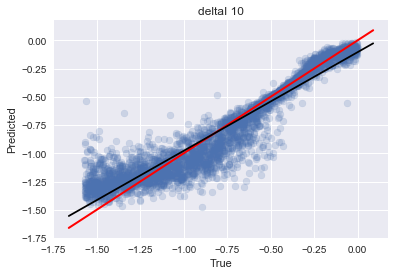

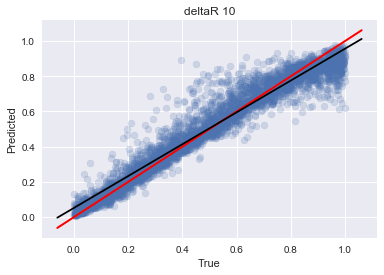

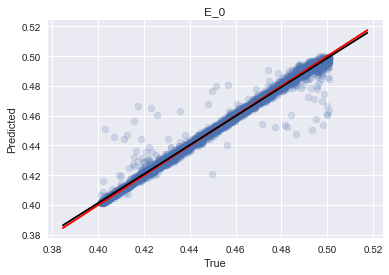

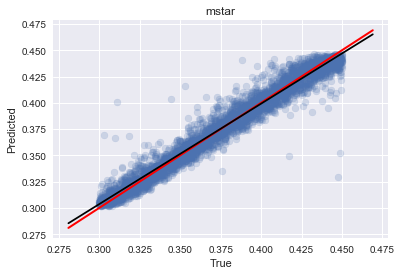

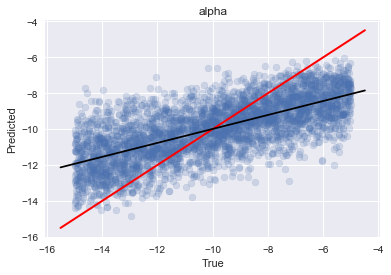

In [15]:
#Trying Independent Random Forest

rs = 42
md = 40
n = 40

regr_RF2_dr_pi = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_di_pi = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_E0_pi = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_mstar_pi = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_alpha_pi = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)


model_RF2_dr_pi = regr_RF2_dr_pi.fit(X2_train, Y2_train['deltaR'])
model_RF2_di_pi = regr_RF2_di_pi.fit(X2_train, Y2_train['deltaI'])
model_RF2_E0_pi = regr_RF2_E0_pi.fit(X2_train, Y2_train['E_0'])
model_RF2_mstar_pi = regr_RF2_mstar_pi.fit(X2_train, Y2_train['mstar'])
model_RF2_alpha_pi = regr_RF2_alpha_pi.fit(X2_train, Y2_train['alpha'])

predictions_RF2_dr_pi = model_RF2_dr_pi.predict(X2_test)
predictions_RF2_di_pi = model_RF2_di_pi.predict(X2_test)
predictions_RF2_E0_pi = model_RF2_E0_pi.predict(X2_test)
predictions_RF2_mstar_pi = model_RF2_mstar_pi.predict(X2_test)
predictions_RF2_alpha_pi = model_RF2_alpha_pi.predict(X2_test)

scores_RF2_pi = [r2_score(Y2_test['deltaI'], predictions_RF2_di_pi), 
              r2_score(Y2_test['deltaR'], predictions_RF2_dr_pi), 
              r2_score(Y2_test['E_0'], predictions_RF2_E0_pi), 
              r2_score(Y2_test['mstar'], predictions_RF2_mstar_pi), 
              r2_score(Y2_test['alpha'], predictions_RF2_alpha_pi)]

plotSummary(Y2_test['deltaR'], predictions_RF2_dr_pi, 'deltaI 10')
plotSummary(Y2_test['deltaI'], predictions_RF2_di_pi, 'deltaR 10')
plotSummary(Y2_test['E_0'], predictions_RF2_E0_pi, 'E_0')
plotSummary(Y2_test['mstar'], predictions_RF2_mstar_pi, 'mstar')
plotSummary(Y2_test['alpha'], predictions_RF2_alpha_pi, 'alpha')

### spec points and peak info

 
RMSE on test data: 0.19118464960408138 for  deltaI 10
R^2 Score on test data: 0.8190502929762793 for deltaI 10
 
RMSE on test data: 0.09382881586631461 for  deltaR 10
R^2 Score on test data: 0.8951455992789288 for deltaR 10
 
RMSE on test data: 0.004011487728282119 for  E_0
R^2 Score on test data: 0.9808454941534669 for E_0
 
RMSE on test data: 0.009315321977282656 for  mstar
R^2 Score on test data: 0.9543812001232456 for mstar
 
RMSE on test data: 1.760141172567677 for  alpha
R^2 Score on test data: 0.6247671106697731 for alpha


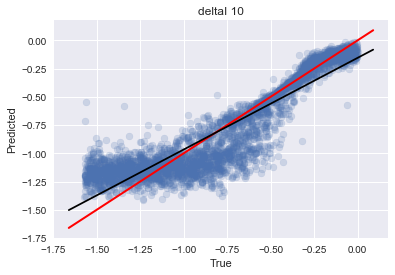

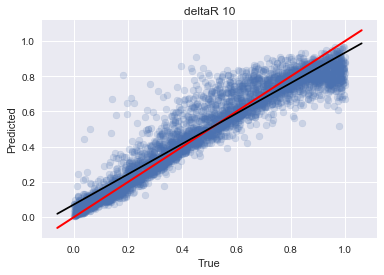

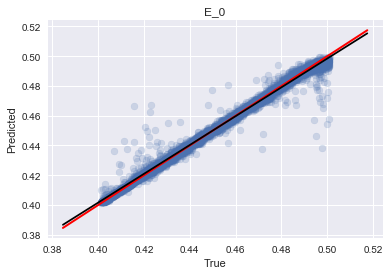

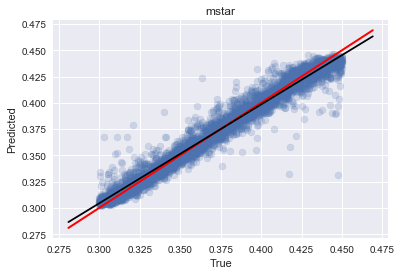

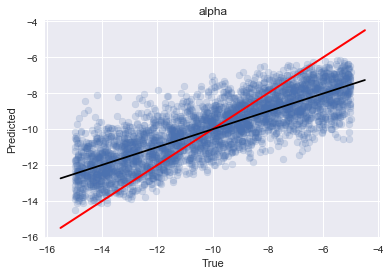

In [16]:
#Trying Independent Random Forest

rs = 42
md = 40
n = 40

regr_RF2_dr_both = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_di_both = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_E0_both = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_mstar_both = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_alpha_both = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)


model_RF2_dr_both = regr_RF2_dr_both.fit(X_train, Y_train['deltaR'])
model_RF2_di_both = regr_RF2_di_both.fit(X_train, Y_train['deltaI'])
model_RF2_E0_both = regr_RF2_E0_both.fit(X_train, Y_train['E_0'])
model_RF2_mstar_both = regr_RF2_mstar_both.fit(X_train, Y_train['mstar'])
model_RF2_alpha_both = regr_RF2_alpha_both.fit(X_train, Y_train['alpha'])

predictions_RF2_dr_both = model_RF2_dr_both.predict(X_test)
predictions_RF2_di_both = model_RF2_di_both.predict(X_test)
predictions_RF2_E0_both = model_RF2_E0_both.predict(X_test)
predictions_RF2_mstar_both = model_RF2_mstar_both.predict(X_test)
predictions_RF2_alpha_both = model_RF2_alpha_both.predict(X_test)

scores_RF2_both = [r2_score(Y_test['deltaI'], predictions_RF2_di_both), 
              r2_score(Y_test['deltaR'], predictions_RF2_dr_both), 
              r2_score(Y_test['E_0'], predictions_RF2_E0_both), 
              r2_score(Y_test['mstar'], predictions_RF2_mstar_both), 
              r2_score(Y_test['alpha'], predictions_RF2_alpha_both)]

plotSummary(Y_test['deltaR'], predictions_RF2_dr_both, 'deltaI 10')
plotSummary(Y_test['deltaI'], predictions_RF2_di_both, 'deltaR 10')
plotSummary(Y_test['E_0'], predictions_RF2_E0_both, 'E_0')
plotSummary(Y_test['mstar'], predictions_RF2_mstar_both, 'mstar')
plotSummary(Y_test['alpha'], predictions_RF2_alpha_both, 'alpha')

## AdaBoost Random Forest 

### spec points

 
RMSE on test data: 0.1540525365795638 for  AdaBoost Delta I
R^2 Score on test data: 0.717348106751908 for AdaBoost Delta I
 
RMSE on test data: 0.23937056279855592 for  AdaBoost Delta R
R^2 Score on test data: 0.7163431163992304 for AdaBoost Delta R
 
RMSE on test data: 0.004385672818118561 for  AdaBoost E_0
R^2 Score on test data: 0.9771054308655354 for AdaBoost E_0
 
RMSE on test data: 0.009050025411605675 for  AdaBoost mstar
R^2 Score on test data: 0.9569426088823184 for AdaBoost mstar
 
RMSE on test data: 1.925064852637202 for  AdaBoost alpha
R^2 Score on test data: 0.5511547605289482 for AdaBoost alpha


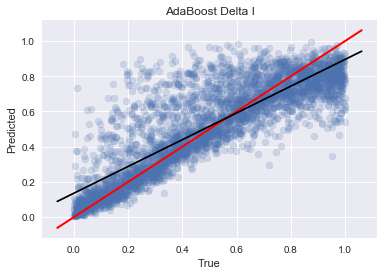

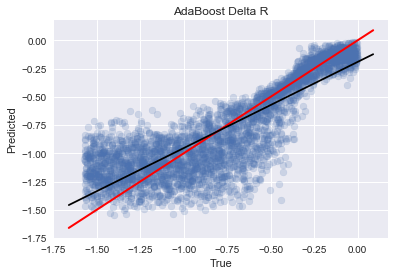

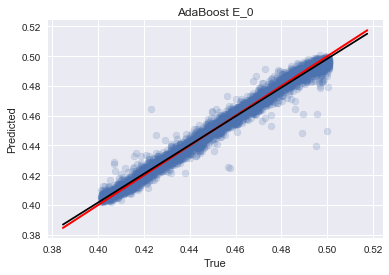

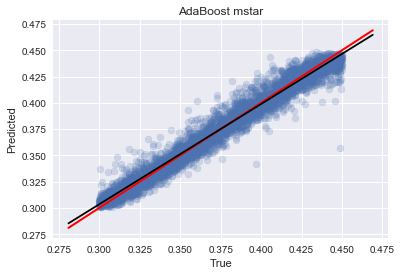

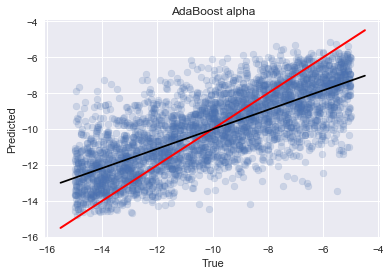

In [17]:
#Using AdaBoost Regression

from sklearn.ensemble import AdaBoostRegressor

rng = 42
md = 30
nest2 = 15

regr_AB_di_sp = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators=nest2, random_state=rng)
regr_AB_dr_sp = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md),n_estimators=nest2, random_state=rng)
regr_AB_E0_sp = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)
regr_AB_mstar_sp = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)
regr_AB_alpha_sp = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)

model_AB_di_sp = regr_AB_di_sp.fit(X1_train, Y1_train['deltaI'])
model_AB_dr_sp = regr_AB_dr_sp.fit(X1_train, Y1_train['deltaR'])
model_AB_E0_sp = regr_AB_E0_sp.fit(X1_train, Y1_train['E_0'])
model_AB_mstar_sp = regr_AB_mstar_sp.fit(X1_train, Y1_train['mstar'])
model_AB_alpha_sp = regr_AB_alpha_sp.fit(X1_train, Y1_train['alpha'])

predictions_AB_di_sp = model_AB_di_sp.predict(X1_test)
predictions_AB_dr_sp = model_AB_dr_sp.predict(X1_test)
predictions_AB_E0_sp = model_AB_E0_sp.predict(X1_test)
predictions_AB_mstar_sp = model_AB_mstar_sp.predict(X1_test)
predictions_AB_alpha_sp = model_AB_alpha_sp.predict(X1_test)

scores_AB = [r2_score(Y1_test['deltaI'], predictions_AB_di_sp), 
             r2_score(Y1_test['deltaR'], predictions_AB_dr_sp), 
             r2_score(Y1_test['E_0'], predictions_AB_E0_sp), 
             r2_score(Y1_test['mstar'], predictions_AB_mstar_sp), 
             r2_score(Y1_test['alpha'], predictions_AB_alpha_sp)]

plotSummary(Y1_test['deltaI'], predictions_AB_di_sp, 'AdaBoost Delta I')
plotSummary(Y1_test['deltaR'], predictions_AB_dr_sp, 'AdaBoost Delta R')
plotSummary(Y1_test['E_0'], predictions_AB_E0_sp, 'AdaBoost E_0')
plotSummary(Y1_test['mstar'], predictions_AB_mstar_sp, 'AdaBoost mstar')
plotSummary(Y1_test['alpha'], predictions_AB_alpha_sp, 'AdaBoost alpha')


### peak info

 
RMSE on test data: 0.07687050590119594 for  AdaBoost Delta I
R^2 Score on test data: 0.9296225268155057 for AdaBoost Delta I
 
RMSE on test data: 0.15830250294886883 for  AdaBoost Delta R
R^2 Score on test data: 0.8759412477958233 for AdaBoost Delta R
 
RMSE on test data: 0.004263682395192691 for  AdaBoost E_0
R^2 Score on test data: 0.978361372583991 for AdaBoost E_0
 
RMSE on test data: 0.009584357058418575 for  AdaBoost mstar
R^2 Score on test data: 0.951708123194517 for AdaBoost mstar
 
RMSE on test data: 2.2852214250976846 for  AdaBoost alpha
R^2 Score on test data: 0.3674971773946062 for AdaBoost alpha


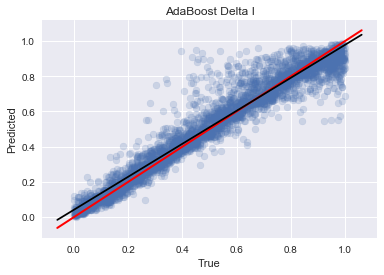

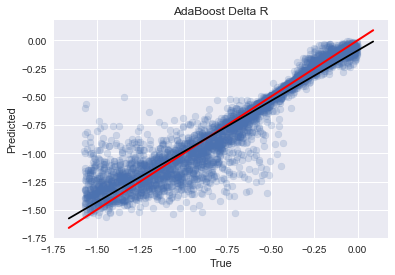

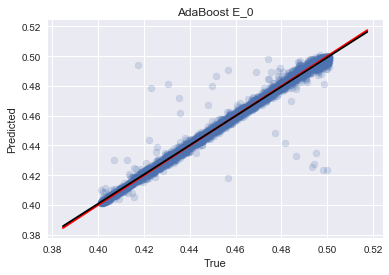

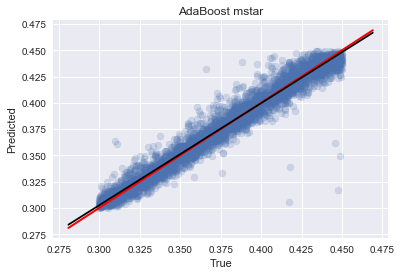

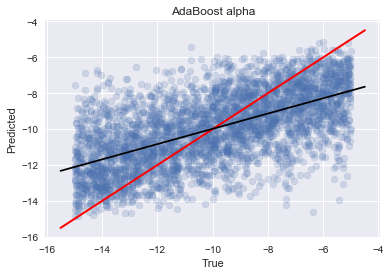

In [18]:
#Using AdaBoost Regression

from sklearn.ensemble import AdaBoostRegressor

rng = 42
md = 30
nest2 = 15

regr_AB_di_pi = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators=nest2, random_state=rng)
regr_AB_dr_pi = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md),n_estimators=nest2, random_state=rng)
regr_AB_E0_pi = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)
regr_AB_mstar_pi = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)
regr_AB_alpha_pi = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)

model_AB_di_pi = regr_AB_di_pi.fit(X2_train, Y2_train['deltaI'])
model_AB_dr_pi = regr_AB_dr_pi.fit(X2_train, Y2_train['deltaR'])
model_AB_E0_pi = regr_AB_E0_pi.fit(X2_train, Y2_train['E_0'])
model_AB_mstar_pi = regr_AB_mstar_pi.fit(X2_train, Y2_train['mstar'])
model_AB_alpha_pi = regr_AB_alpha_pi.fit(X2_train, Y2_train['alpha'])

predictions_AB_di_pi = model_AB_di_pi.predict(X2_test)
predictions_AB_dr_pi = model_AB_dr_pi.predict(X2_test)
predictions_AB_E0_pi = model_AB_E0_pi.predict(X2_test)
predictions_AB_mstar_pi = model_AB_mstar_pi.predict(X2_test)
predictions_AB_alpha_pi = model_AB_alpha_pi.predict(X2_test)

scores_AB_pi = [r2_score(Y2_test['deltaI'], predictions_AB_di_pi), 
             r2_score(Y2_test['deltaR'], predictions_AB_dr_pi), 
             r2_score(Y2_test['E_0'], predictions_AB_E0_pi), 
             r2_score(Y2_test['mstar'], predictions_AB_mstar_pi), 
             r2_score(Y2_test['alpha'], predictions_AB_alpha_pi)]

plotSummary(Y2_test['deltaI'], predictions_AB_di_pi, 'AdaBoost Delta I')
plotSummary(Y2_test['deltaR'], predictions_AB_dr_pi, 'AdaBoost Delta R')
plotSummary(Y2_test['E_0'], predictions_AB_E0_pi, 'AdaBoost E_0')
plotSummary(Y2_test['mstar'], predictions_AB_mstar_pi, 'AdaBoost mstar')
plotSummary(Y2_test['alpha'], predictions_AB_alpha_pi, 'AdaBoost alpha')

### spec points and peak info

 
RMSE on test data: 0.10187943466658465 for  AdaBoost Delta I
R^2 Score on test data: 0.876380425557801 for AdaBoost Delta I
 
RMSE on test data: 0.20101571821231162 for  AdaBoost Delta R
R^2 Score on test data: 0.7999622867063766 for AdaBoost Delta R
 
RMSE on test data: 0.0028802248008790664 for  AdaBoost E_0
R^2 Score on test data: 0.9901255528937725 for AdaBoost E_0
 
RMSE on test data: 0.009264238729396355 for  AdaBoost mstar
R^2 Score on test data: 0.9548801559034149 for AdaBoost mstar
 
RMSE on test data: 1.841305316526977 for  AdaBoost alpha
R^2 Score on test data: 0.5893635394320086 for AdaBoost alpha


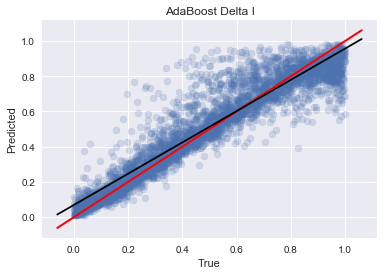

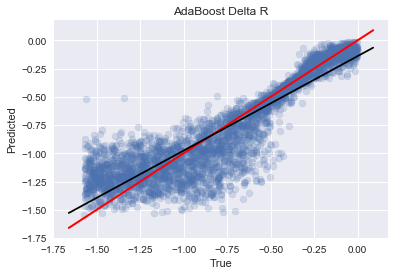

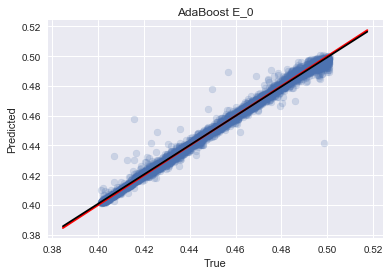

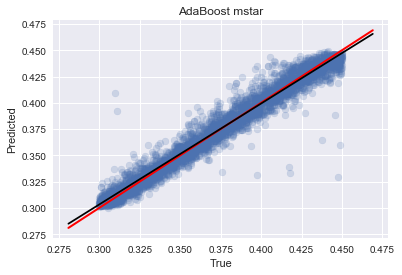

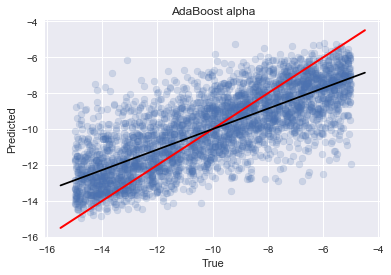

In [19]:
#Using AdaBoost Regression

from sklearn.ensemble import AdaBoostRegressor

rng = 42
md = 30
nest2 = 15

regr_AB_di_both = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators=nest2, random_state=rng)
regr_AB_dr_both = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md),n_estimators=nest2, random_state=rng)
regr_AB_E0_both = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)
regr_AB_mstar_both = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)
regr_AB_alpha_both = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)

model_AB_di_both = regr_AB_di_both.fit(X_train, Y_train['deltaI'])
model_AB_dr_both = regr_AB_dr_both.fit(X_train, Y_train['deltaR'])
model_AB_E0_both = regr_AB_E0_both.fit(X_train, Y_train['E_0'])
model_AB_mstar_both = regr_AB_mstar_both.fit(X_train, Y_train['mstar'])
model_AB_alpha_both = regr_AB_alpha_both.fit(X_train, Y_train['alpha'])

predictions_AB_di_both = model_AB_di_both.predict(X_test)
predictions_AB_dr_both = model_AB_dr_both.predict(X_test)
predictions_AB_E0_both = model_AB_E0_both.predict(X_test)
predictions_AB_mstar_both = model_AB_mstar_both.predict(X_test)
predictions_AB_alpha_both = model_AB_alpha_both.predict(X_test)

scores_AB_both = [r2_score(Y_test['deltaI'], predictions_AB_di_both), 
             r2_score(Y_test['deltaR'], predictions_AB_dr_both), 
             r2_score(Y_test['E_0'], predictions_AB_E0_both), 
             r2_score(Y_test['mstar'], predictions_AB_mstar_both), 
             r2_score(Y_test['alpha'], predictions_AB_alpha_both)]

plotSummary(Y_test['deltaI'], predictions_AB_di_both, 'AdaBoost Delta I')
plotSummary(Y_test['deltaR'], predictions_AB_dr_both, 'AdaBoost Delta R')
plotSummary(Y_test['E_0'], predictions_AB_E0_both, 'AdaBoost E_0')
plotSummary(Y_test['mstar'], predictions_AB_mstar_both, 'AdaBoost mstar')
plotSummary(Y_test['alpha'], predictions_AB_alpha_both, 'AdaBoost alpha')

## Gradient Boosting Random Forest 

### spec points

 
RMSE on test data: 0.19303629083231907 for  GradientBoost Delta I
R^2 Score on test data: 0.5561950727491438 for GradientBoost Delta I
 
RMSE on test data: 0.2963440255100261 for  GradientBoost Delta R
R^2 Score on test data: 0.5652453883902906 for GradientBoost Delta R
 
RMSE on test data: 0.007461324111114031 for  GradientBoost E_0
R^2 Score on test data: 0.9337338364940129 for GradientBoost E_0
 
RMSE on test data: 0.012681597474905307 for  GradientBoost mstar
R^2 Score on test data: 0.91545342030193 for GradientBoost mstar
 
RMSE on test data: 2.5538589495137263 for  GradientBoost alpha
R^2 Score on test data: 0.2100498090987769 for GradientBoost alpha


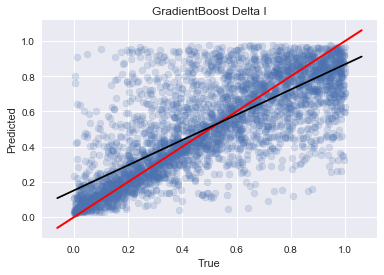

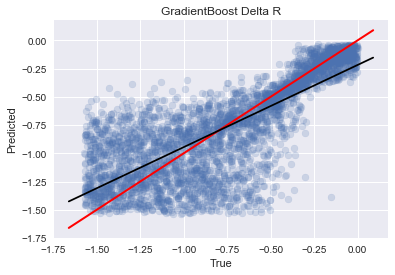

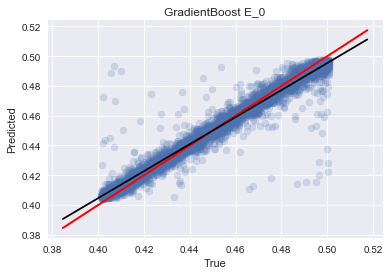

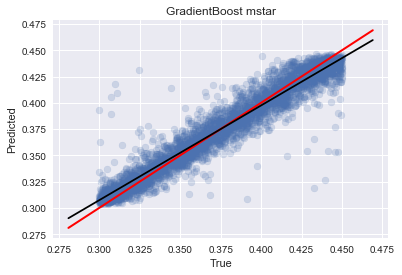

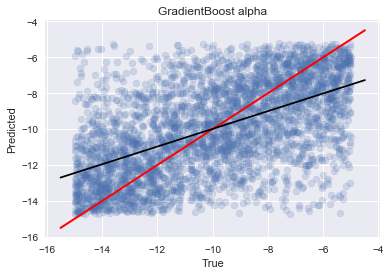

In [20]:
# Using Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

rng = 42

md = 50
nest2 = 30


regr_GB_di_sp = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GB_dr_sp = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GB_E0_sp = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)
regr_GB_mstar_sp = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)
regr_GB_alpha_sp = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)

model_GB_di_sp = regr_GB_di_sp.fit(X1_train, Y1_train['deltaI'])
model_GB_dr_sp = regr_GB_dr_sp.fit(X1_train, Y1_train['deltaR'])
model_GB_E0_sp = regr_GB_E0_sp.fit(X1_train, Y1_train['E_0'])
model_GB_mstar_sp = regr_GB_mstar_sp.fit(X1_train, Y1_train['mstar'])
model_GB_alpha_sp = regr_GB_alpha_sp.fit(X1_train, Y1_train['alpha'])

predictions_GB_di_sp = model_GB_di_sp.predict(X1_test)
predictions_GB_dr_sp = model_GB_dr_sp.predict(X1_test)
predictions_GB_E0_sp = model_GB_E0_sp.predict(X1_test)
predictions_GB_mstar_sp = model_GB_mstar_sp.predict(X1_test)
predictions_GB_alpha_sp = model_GB_alpha_sp.predict(X1_test)

scores_GB = [r2_score(Y1_test['deltaI'], predictions_GB_di_sp), 
             r2_score(Y1_test['deltaR'], predictions_GB_dr_sp), 
             r2_score(Y1_test['E_0'], predictions_GB_E0_sp), 
             r2_score(Y1_test['mstar'], predictions_GB_mstar_sp), 
             r2_score(Y1_test['alpha'], predictions_GB_alpha_sp)]

plotSummary(Y1_test['deltaI'], predictions_GB_di_sp, 'GradientBoost Delta I')
plotSummary(Y1_test['deltaR'], predictions_GB_dr_sp, 'GradientBoost Delta R')
plotSummary(Y1_test['E_0'], predictions_GB_E0_sp, 'GradientBoost E_0')
plotSummary(Y1_test['mstar'], predictions_GB_mstar_sp, 'GradientBoost mstar')
plotSummary(Y1_test['alpha'], predictions_GB_alpha_sp, 'GradientBoost alpha')




### peak info

 
RMSE on test data: 0.10034087913793757 for  GradientBoost Delta I
R^2 Score on test data: 0.8800859710263771 for GradientBoost Delta I
 
RMSE on test data: 0.19753983556751925 for  GradientBoost Delta R
R^2 Score on test data: 0.8068204183269239 for GradientBoost Delta R
 
RMSE on test data: 0.005149238430421797 for  GradientBoost E_0
R^2 Score on test data: 0.9684393441012799 for GradientBoost E_0
 
RMSE on test data: 0.011214400816816086 for  GradientBoost mstar
R^2 Score on test data: 0.9338849602707805 for GradientBoost mstar
 
RMSE on test data: 2.738160892741272 for  GradientBoost alpha
R^2 Score on test data: 0.09192060663732982 for GradientBoost alpha


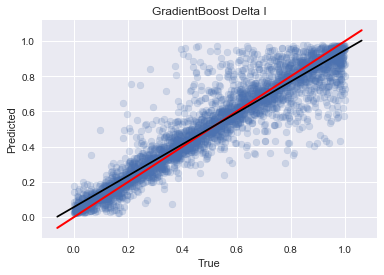

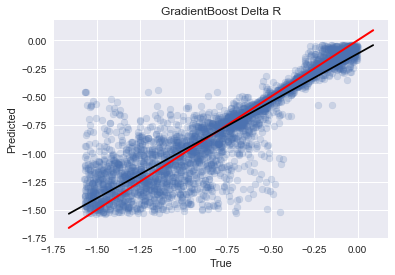

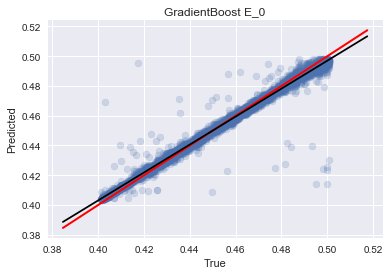

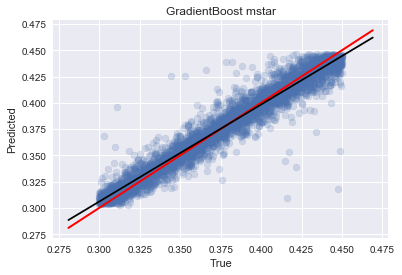

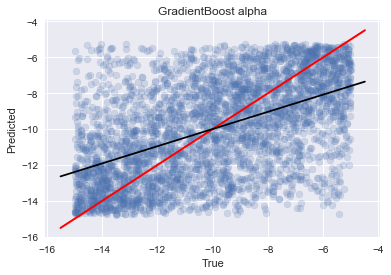

In [21]:
# Using Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

rng = 42

md = 50
nest2 = 30


regr_GB_di_pi = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GB_dr_pi = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GB_E0_pi = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)
regr_GB_mstar_pi = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)
regr_GB_alpha_pi = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)

model_GB_di_pi = regr_GB_di_pi.fit(X2_train, Y2_train['deltaI'])
model_GB_dr_pi = regr_GB_dr_pi.fit(X2_train, Y2_train['deltaR'])
model_GB_E0_pi = regr_GB_E0_pi.fit(X2_train, Y2_train['E_0'])
model_GB_mstar_pi = regr_GB_mstar_pi.fit(X2_train, Y2_train['mstar'])
model_GB_alpha_pi = regr_GB_alpha_pi.fit(X2_train, Y2_train['alpha'])

predictions_GB_di_pi = model_GB_di_pi.predict(X2_test)
predictions_GB_dr_pi = model_GB_dr_pi.predict(X2_test)
predictions_GB_E0_pi = model_GB_E0_pi.predict(X2_test)
predictions_GB_mstar_pi = model_GB_mstar_pi.predict(X2_test)
predictions_GB_alpha_pi = model_GB_alpha_pi.predict(X2_test)

scores_GB_pi = [r2_score(Y2_test['deltaI'], predictions_GB_di_pi), 
             r2_score(Y2_test['deltaR'], predictions_GB_dr_pi), 
             r2_score(Y2_test['E_0'], predictions_GB_E0_pi), 
             r2_score(Y2_test['mstar'], predictions_GB_mstar_pi), 
             r2_score(Y2_test['alpha'], predictions_GB_alpha_pi)]

plotSummary(Y2_test['deltaI'], predictions_GB_di_pi, 'GradientBoost Delta I')
plotSummary(Y2_test['deltaR'], predictions_GB_dr_pi, 'GradientBoost Delta R')
plotSummary(Y2_test['E_0'], predictions_GB_E0_pi, 'GradientBoost E_0')
plotSummary(Y2_test['mstar'], predictions_GB_mstar_pi, 'GradientBoost mstar')
plotSummary(Y2_test['alpha'], predictions_GB_alpha_pi, 'GradientBoost alpha')



### spec points and peak info

 
RMSE on test data: 0.11690613860967104 for  GradientBoost Delta I
R^2 Score on test data: 0.8372245803769799 for GradientBoost Delta I
 
RMSE on test data: 0.2557860472271307 for  GradientBoost Delta R
R^2 Score on test data: 0.6761040283240171 for GradientBoost Delta R
 
RMSE on test data: 0.005178606334037825 for  GradientBoost E_0
R^2 Score on test data: 0.9680783146226758 for GradientBoost E_0
 
RMSE on test data: 0.012538585943937825 for  GradientBoost mstar
R^2 Score on test data: 0.9173495472534533 for GradientBoost mstar
 
RMSE on test data: 2.3902558951294335 for  GradientBoost alpha
R^2 Score on test data: 0.3080181721167753 for GradientBoost alpha


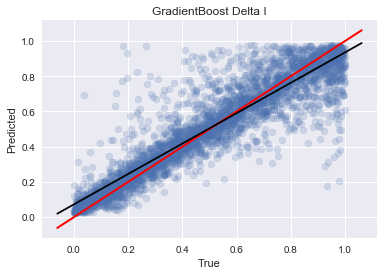

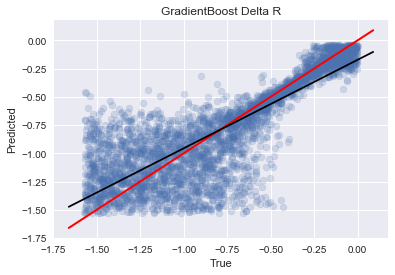

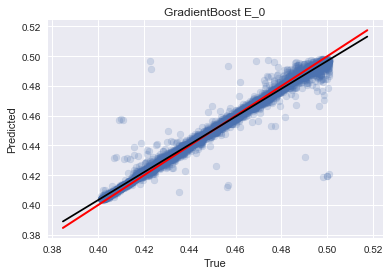

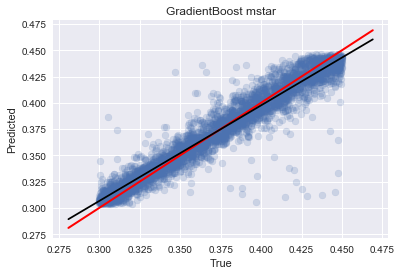

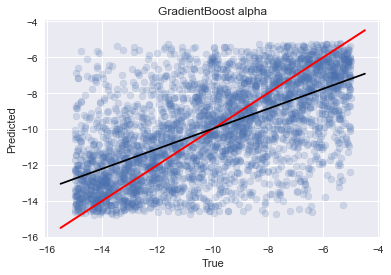

In [22]:
# Using Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

rng = 42

md = 50
nest2 = 30


regr_GB_di_both = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GB_dr_both = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GB_E0_both = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)
regr_GB_mstar_both = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)
regr_GB_alpha_both = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)

model_GB_di_both = regr_GB_di_both.fit(X_train, Y_train['deltaI'])
model_GB_dr_both = regr_GB_dr_both.fit(X_train, Y_train['deltaR'])
model_GB_E0_both = regr_GB_E0_both.fit(X_train, Y_train['E_0'])
model_GB_mstar_both = regr_GB_mstar_both.fit(X_train, Y_train['mstar'])
model_GB_alpha_both = regr_GB_alpha_both.fit(X_train, Y_train['alpha'])

predictions_GB_di_both = model_GB_di_both.predict(X_test)
predictions_GB_dr_both = model_GB_dr_both.predict(X_test)
predictions_GB_E0_both = model_GB_E0_both.predict(X_test)
predictions_GB_mstar_both = model_GB_mstar_both.predict(X_test)
predictions_GB_alpha_both = model_GB_alpha_both.predict(X_test)

scores_GB_both = [r2_score(Y_test['deltaI'], predictions_GB_di_both), 
             r2_score(Y_test['deltaR'], predictions_GB_dr_both), 
             r2_score(Y_test['E_0'], predictions_GB_E0_both), 
             r2_score(Y_test['mstar'], predictions_GB_mstar_both), 
             r2_score(Y_test['alpha'], predictions_GB_alpha_both)]

plotSummary(Y_test['deltaI'], predictions_GB_di_both, 'GradientBoost Delta I')
plotSummary(Y_test['deltaR'], predictions_GB_dr_both, 'GradientBoost Delta R')
plotSummary(Y_test['E_0'], predictions_GB_E0_both, 'GradientBoost E_0')
plotSummary(Y_test['mstar'], predictions_GB_mstar_both, 'GradientBoost mstar')
plotSummary(Y_test['alpha'], predictions_GB_alpha_both, 'GradientBoost alpha')



## Testing the Models on the Experimental Data



In [25]:
# Load the experimental data
col_names3 = peak_names + locs_names + width_names + prom_names
col_names4 = energy_names

exp_data_sp = pd.read_csv('Training_Data/Hexagon/HexagonExperimentalData062218_v8_specPoints.csv', header = None, names = col_names4)
exp_data_pi = pd.read_csv('Training_Data/Hexagon/HexagonExperimentalData062218_v8_peakinfo.csv', header = None, names = col_names3)

col_names_exp_both = col_names_both[5:]
col_names_exp_pi = col_names2a[5:]
col_names_exp_a = col_names_a[5:]

exp_data_both = exp_data_sp.join(exp_data_pi, how = 'left')
exp_data_both = exp_data_both[col_names_exp_both]

exp_data_sp = exp_data_sp[col_names_exp_a]
exp_data_pi = exp_data_pi[col_names_exp_pi]

pred_phase_OLS_R_sp = results_OLS_R_sp.predict(exp_data_sp)
pred_phase_OLS_I_sp = results_OLS_I_sp.predict(exp_data_sp)
pred_phase_OLS_E0_sp = results_OLS_E0_sp.predict(exp_data_sp)
pred_phase_OLS_mstar_sp = results_OLS_mstar_sp.predict(exp_data_sp)
pred_phase_OLS_alpha_sp = results_OLS_alpha_sp.predict(exp_data_sp)

pred_phase_OLS_R_pi = results_OLS_R_pi.predict(exp_data_pi)
pred_phase_OLS_I_pi = results_OLS_I_pi.predict(exp_data_pi)
pred_phase_OLS_E0_pi = results_OLS_E0_pi.predict(exp_data_pi)
pred_phase_OLS_mstar_pi = results_OLS_mstar_pi.predict(exp_data_pi)
pred_phase_OLS_alpha_pi = results_OLS_alpha_pi.predict(exp_data_pi)

pred_phase_OLS_R_both = results_OLS_R_both.predict(exp_data_both)
pred_phase_OLS_I_both = results_OLS_I_both.predict(exp_data_both)
pred_phase_OLS_E0_both = results_OLS_E0_both.predict(exp_data_both)
pred_phase_OLS_mstar_both = results_OLS_mstar_both.predict(exp_data_both)
pred_phase_OLS_alpha_both = results_OLS_alpha_both.predict(exp_data_both)

phases_OLS_sp = [pred_phase_OLS_I_sp[0], 
                 pred_phase_OLS_R_pi[0], 
                 pred_phase_OLS_E0_sp[0], 
                 pred_phase_OLS_mstar_sp[0], 
                 pred_phase_OLS_alpha_sp[0]]

phases_OLS_pi = [pred_phase_OLS_I_pi[0], 
                 pred_phase_OLS_R_pi[0], 
                 pred_phase_OLS_E0_pi[0], 
                 pred_phase_OLS_mstar_pi[0], 
                 pred_phase_OLS_alpha_pi[0]]

phases_OLS_both = [pred_phase_OLS_I_both[0], 
                 pred_phase_OLS_R_both[0], 
                 pred_phase_OLS_E0_both[0], 
                 pred_phase_OLS_mstar_both[0], 
                 pred_phase_OLS_alpha_both[0]]

#pred_phase_DT_sp = np.append(regr_DT_sp.predict(exp_data_sp),r2_score(Y1_test['deltaI'], predictions_DT_sp[:,0])).reshape(3,1).T
#pred_phase_DT_sp = np.append(pred_phase_DT_sp, r2_score(Y1_test['deltaR'], predictions_DT_sp[:,1])).reshape(4,1).T
#pred_phase_DT = np.append(pred_phase_DT, r2_score(Y_test['scale_factor'], y_pred_DT[:,2]))
phases_DT_sp = regr_DT_sp.predict(exp_data_sp)
phases_DT_pi = regr_DT_pi.predict(exp_data_pi)
phases_DT_both = regr_DT_both.predict(exp_data_both)

phases_RF_sp = regr_RF_sp.predict(exp_data_sp)
phases_RF_pi = regr_RF_pi.predict(exp_data_pi)
phases_RF_both = regr_RF_both.predict(exp_data_both)

pred_phase_AB_R_sp = model_AB_dr_sp.predict(exp_data_sp)
pred_phase_AB_I_sp = model_AB_di_sp.predict(exp_data_sp)
pred_phase_AB_E0_sp = model_AB_E0_sp.predict(exp_data_sp)
pred_phase_AB_mstar_sp = model_AB_mstar_sp.predict(exp_data_sp)
pred_phase_AB_alpha_sp = model_AB_alpha_sp.predict(exp_data_sp)

pred_phase_AB_R_pi = model_AB_dr_pi.predict(exp_data_pi)
pred_phase_AB_I_pi = model_AB_di_pi.predict(exp_data_pi)
pred_phase_AB_E0_pi = model_AB_E0_pi.predict(exp_data_pi)
pred_phase_AB_mstar_pi = model_AB_mstar_pi.predict(exp_data_pi)
pred_phase_AB_alpha_pi = model_AB_alpha_pi.predict(exp_data_pi)

pred_phase_AB_R_both = model_AB_dr_both.predict(exp_data_both)
pred_phase_AB_I_both = model_AB_di_both.predict(exp_data_both)
pred_phase_AB_E0_both = model_AB_E0_both.predict(exp_data_both)
pred_phase_AB_mstar_both = model_AB_mstar_both.predict(exp_data_both)
pred_phase_AB_alpha_both = model_AB_alpha_both.predict(exp_data_both)

phases_AB_sp = [pred_phase_AB_I_sp[0], 
                pred_phase_AB_R_sp[0], 
                pred_phase_AB_E0_sp[0], 
                pred_phase_AB_mstar_sp[0], 
                pred_phase_AB_alpha_sp[0]]

phases_AB_pi = [pred_phase_AB_I_pi[0], 
                pred_phase_AB_R_pi[0], 
                pred_phase_AB_E0_pi[0], 
                pred_phase_AB_mstar_pi[0], 
                pred_phase_AB_alpha_pi[0]]

phases_AB_both = [pred_phase_AB_I_both[0], 
                pred_phase_AB_R_both[0], 
                pred_phase_AB_E0_both[0], 
                pred_phase_AB_mstar_both[0], 
                pred_phase_AB_alpha_both[0]]

pred_phase_GB_di_sp = model_GB_di_sp.predict(exp_data_sp)
pred_phase_GB_dr_sp = model_GB_dr_sp.predict(exp_data_sp)
pred_phase_GB_E0_sp = model_GB_E0_sp.predict(exp_data_sp)
pred_phase_GB_mstar_sp = model_GB_mstar_sp.predict(exp_data_sp)
pred_phase_GB_alpha_sp = model_GB_alpha_sp.predict(exp_data_sp)

pred_phase_GB_di_pi = model_GB_di_pi.predict(exp_data_pi)
pred_phase_GB_dr_pi = model_GB_dr_pi.predict(exp_data_pi)
pred_phase_GB_E0_pi = model_GB_E0_pi.predict(exp_data_pi)
pred_phase_GB_mstar_pi = model_GB_mstar_pi.predict(exp_data_pi)
pred_phase_GB_alpha_pi = model_GB_alpha_pi.predict(exp_data_pi)

pred_phase_GB_di_both = model_GB_di_both.predict(exp_data_both)
pred_phase_GB_dr_both = model_GB_dr_both.predict(exp_data_both)
pred_phase_GB_E0_both = model_GB_E0_both.predict(exp_data_both)
pred_phase_GB_mstar_both = model_GB_mstar_both.predict(exp_data_both)
pred_phase_GB_alpha_both = model_GB_alpha_both.predict(exp_data_both)

phases_GB_sp = [pred_phase_GB_di_sp[0], 
                pred_phase_GB_dr_sp[0], 
                pred_phase_GB_E0_sp[0], 
                pred_phase_GB_mstar_sp[0], 
                pred_phase_GB_alpha_sp[0]]

phases_GB_pi = [pred_phase_GB_di_pi[0], 
                pred_phase_GB_dr_pi[0], 
                pred_phase_GB_E0_pi[0], 
                pred_phase_GB_mstar_pi[0], 
                pred_phase_GB_alpha_pi[0]]

phases_GB_both = [pred_phase_GB_di_both[0], 
                pred_phase_GB_dr_both[0], 
                pred_phase_GB_E0_both[0], 
                pred_phase_GB_mstar_both[0], 
                pred_phase_GB_alpha_both[0]]

pred_phase_IRF_di_sp = model_RF2_di_sp.predict(exp_data_sp)
pred_phase_IRF_dr_sp = model_RF2_dr_sp.predict(exp_data_sp)
pred_phase_IRF_E0_sp = model_RF2_E0_sp.predict(exp_data_sp)
pred_phase_IRF_mstar_sp = model_RF2_mstar_sp.predict(exp_data_sp)
pred_phase_IRF_alpha_sp = model_RF2_alpha_sp.predict(exp_data_sp)

pred_phase_IRF_di_pi = model_RF2_di_pi.predict(exp_data_pi)
pred_phase_IRF_dr_pi = model_RF2_dr_pi.predict(exp_data_pi)
pred_phase_IRF_E0_pi = model_RF2_E0_pi.predict(exp_data_pi)
pred_phase_IRF_mstar_pi = model_RF2_mstar_pi.predict(exp_data_pi)
pred_phase_IRF_alpha_pi = model_RF2_alpha_pi.predict(exp_data_pi)

pred_phase_IRF_di_both = model_RF2_di_both.predict(exp_data_both)
pred_phase_IRF_dr_both = model_RF2_dr_both.predict(exp_data_both)
pred_phase_IRF_E0_both = model_RF2_E0_both.predict(exp_data_both)
pred_phase_IRF_mstar_both = model_RF2_mstar_both.predict(exp_data_both)
pred_phase_IRF_alpha_both = model_RF2_alpha_both.predict(exp_data_both)

phases_IRF_sp = [pred_phase_IRF_di_sp[0], 
                 pred_phase_IRF_dr_sp[0], 
                 pred_phase_IRF_E0_sp[0], 
                 pred_phase_IRF_mstar_sp[0], 
                 pred_phase_IRF_alpha_sp[0]]

phases_IRF_pi = [pred_phase_IRF_di_pi[0], 
                 pred_phase_IRF_dr_pi[0], 
                 pred_phase_IRF_E0_pi[0], 
                 pred_phase_IRF_mstar_pi[0], 
                 pred_phase_IRF_alpha_pi[0]]

phases_IRF_both = [pred_phase_IRF_di_both[0], 
                 pred_phase_IRF_dr_both[0], 
                 pred_phase_IRF_E0_both[0], 
                 pred_phase_IRF_mstar_both[0], 
                 pred_phase_IRF_alpha_both[0]]

predictedPhases = pd.DataFrame([], columns = ['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha'])

predictedPhases.loc['OLS_sp'] = phases_OLS_sp
predictedPhases.loc['OLS_pi'] = phases_OLS_pi
predictedPhases.loc['OLS_both'] = phases_OLS_both
predictedPhases.loc['DT_sp'] = phases_DT_sp.tolist()[0]
predictedPhases.loc['DT_pi'] = phases_DT_pi.tolist()[0]
predictedPhases.loc['DT_both'] = phases_DT_both.tolist()[0]
predictedPhases.loc['RF_sp'] = phases_RF_sp.tolist()[0]
predictedPhases.loc['RF_pi'] = phases_RF_pi.tolist()[0]
predictedPhases.loc['RF_both'] = phases_RF_both.tolist()[0]
predictedPhases.loc['IRF_sp'] = phases_IRF_sp
predictedPhases.loc['IRF_pi'] = phases_IRF_pi
predictedPhases.loc['IRF_both'] = phases_IRF_both
predictedPhases.loc['AB_sp'] = phases_AB_sp
predictedPhases.loc['AB_pi'] = phases_AB_pi
predictedPhases.loc['AB_both'] = phases_AB_both
predictedPhases.loc['GB_sp'] = phases_GB_sp
predictedPhases.loc['GB_pi'] = phases_GB_pi
predictedPhases.loc['GB_both'] = phases_GB_both

Scores = pd.DataFrame([], columns = ['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha'])

Scores.loc['OLS_sp'] = scores_OLS
Scores.loc['OLS_pi'] = scores_OLS_pi
Scores.loc['OLS_both'] = scores_OLS_both
Scores.loc['DT_sp'] = scores_DT
Scores.loc['DT_pi'] = scores_DT_pi
Scores.loc['DT_both'] = scores_DT_both
Scores.loc['RF_sp'] = scores_RF
Scores.loc['RF_pi'] = scores_RF_pi
Scores.loc['RF_both'] = scores_RF_both
Scores.loc['IRF_sp'] = scores_RF2
Scores.loc['IRF_pi'] = scores_RF2_pi
Scores.loc['IRF_both'] = scores_RF2_both
Scores.loc['AB_sp'] = scores_AB
Scores.loc['AB_pi'] = scores_AB_pi
Scores.loc['AB_both'] = scores_AB_both
Scores.loc['GB_sp'] = scores_GB
Scores.loc['GB_pi'] = scores_GB_pi
Scores.loc['GB_both'] = scores_GB_both

predictedPhases

deltaI    deltaR       E_0     mstar      alpha
OLS_sp    0.508314 -0.531468  0.446727  0.382117  -9.442215
OLS_pi    0.479454 -0.531468  0.518199  0.556308 -10.973382
OLS_both  0.500855 -0.428020  0.493831  0.498932 -10.230613
DT_sp     0.260055 -0.181690  0.422840  0.408035  -8.126650
DT_pi     0.499943 -0.135843  0.455527  0.363753 -14.050000
DT_both   0.415593 -0.192440  0.438527  0.381087 -13.281333
RF_sp     0.263731 -0.150053  0.448343  0.380231  -9.723990
RF_pi     0.424216 -0.101578  0.459288  0.415348 -12.686480
RF_both   0.303264 -0.107352  0.448635  0.378894 -11.221730
IRF_sp    0.227799 -0.067059  0.470251  0.367015 -10.468950
IRF_pi    0.421305 -0.057065  0.448002  0.377114 -12.560763
IRF_both  0.308620 -0.067825  0.449641  0.380592 -10.864115
AB_sp     0.200160 -0.066756  0.458240  0.371227  -9.286400
AB_pi     0.483210 -0.031166  0.448840  0.375850 -14.218000
AB_both   0.364260 -0.059230  0.448560  0.383990 -10.330000
GB_sp     0.117723 -0.148335  0.472719  0.370664  -7.510312
GB_pi     0.460102 -0.064335  0.445131  0.370238 -13.933274
GB_both   0.232714 -0.062725  0.450175  0.369554 -12.680484

In [29]:
score_threshold = 0.95

avgE_0 = predictedPhases[Scores > score_threshold]['E_0'].mean()
avgmstar = predictedPhases[Scores > score_threshold]['mstar'].mean()

avgE_0, avgmstar

(0.4523551855457817, 0.3777545181547619)

In [30]:
predictedPhases[Scores>score_threshold]

deltaI  deltaR       E_0     mstar  alpha
OLS_sp       NaN     NaN       NaN       NaN    NaN
OLS_pi       NaN     NaN       NaN       NaN    NaN
OLS_both     NaN     NaN       NaN       NaN    NaN
DT_sp        NaN     NaN       NaN       NaN    NaN
DT_pi        NaN     NaN       NaN       NaN    NaN
DT_both      NaN     NaN       NaN       NaN    NaN
RF_sp        NaN     NaN       NaN       NaN    NaN
RF_pi        NaN     NaN       NaN       NaN    NaN
RF_both      NaN     NaN       NaN       NaN    NaN
IRF_sp       NaN     NaN  0.470251       NaN    NaN
IRF_pi       NaN     NaN  0.448002  0.377114    NaN
IRF_both     NaN     NaN  0.449641  0.380592    NaN
AB_sp        NaN     NaN  0.458240  0.371227    NaN
AB_pi        NaN     NaN  0.448840  0.375850    NaN
AB_both      NaN     NaN  0.448560  0.383990    NaN
GB_sp        NaN     NaN       NaN       NaN    NaN
GB_pi        NaN     NaN  0.445131       NaN    NaN
GB_both      NaN     NaN  0.450175       NaN    NaN

In [32]:
(predictedPhases[Scores>score_threshold].drop(['AB_sp', 'IRF_sp']))['E_0'].mean()

0.4483916693685819

In [33]:
Scores

deltaI    deltaR       E_0     mstar      alpha
OLS_sp   -11.655103 -2.209264 -8.858668 -2.833882 -10.501235
OLS_pi     0.334786  0.534902  0.656459  0.454092   0.028507
OLS_both   0.325054  0.500540  0.757531  0.686972   0.082581
DT_sp      0.240488  0.374118  0.596534  0.619506   0.115630
DT_pi      0.655085  0.638983  0.552453  0.727340  -0.041237
DT_both    0.401921  0.476356  0.553728  0.622832   0.036437
RF_sp      0.608813  0.696129  0.854649  0.891552   0.556071
RF_pi      0.795662  0.777686  0.845837  0.911191   0.412887
RF_both    0.683778  0.718039  0.867871  0.890316   0.500599
IRF_sp     0.732460  0.743538  0.963866  0.948385   0.582382
IRF_pi     0.931931  0.888755  0.982433  0.954945   0.463598
IRF_both   0.895146  0.819050  0.980845  0.954381   0.624767
AB_sp      0.717348  0.716343  0.977105  0.956943   0.551155
AB_pi      0.929623  0.875941  0.978361  0.951708   0.367497
AB_both    0.876380  0.799962  0.990126  0.954880   0.589364
GB_sp      0.556195  0.565245  0.933734  0.915453   0.210050
GB_pi      0.880086  0.806820  0.968439  0.933885   0.091921
GB_both    0.837225  0.676104  0.968078  0.917350   0.308018

In [34]:
#save_data = True
if save_data == True:
    predictedPhases.to_csv('Model_Results/Hexagon/predictions_v7_threekinds_AllFree_limitallrange300_removepeak1prom1.csv')
    Scores.to_csv('Model_Results/Hexagon/scores_v7_threekinds_AllFree_limitallrange300_removepeak1prom1.csv')